---

### Lista de encabezados

        1. Piezas del Vehículo:
                1: "Antiniebla delantero derecho",
                2: "Antiniebla delantero izquierdo",
                3: "Capó",
                4: "Cerradura capo",
                5: "Cerradura maletero",
                6: "Cerradura puerta",
                7: "Espejo lateral derecho",
                8: "Espejo lateral izquierdo",
                9: "Faros derecho",
                10: "Faros izquierdo",
                11: "Guardabarros delantero derecho",
                12: "Guardabarros delantero izquierdo",
                13: "Guardabarros trasero derecho",
                14: "Guardabarros trasero izquierdo",
                15: "Luz indicadora delantera derecha",
                16: "Luz indicadora delantera izquierda",
                17: "Luz indicadora trasera derecha",
                18: "Luz indicadora trasera izquierda",
                19: "Luz trasera derecho",
                20: "Luz trasera izquierdo",
                21: "Maletero",
                22: "Manija derecha",
                23: "Manija izquierda",
                24: "Marco de la ventana",
                25: "Marco de las puertas",
                26: "Moldura capó",
                27: "Moldura puerta delantera derecha",
                28: "Moldura puerta delantera izquierda",
                29: "Moldura puerta trasera derecha",
                30: "Moldura puerta trasera izquierda",
                31: "Parabrisas delantero",
                32: "Parabrisas trasero",
                33: "Parachoques delantero",
                34: "Parachoques trasero",
                35: "Puerta delantera derecha",
                36: "Puerta delantera izquierda",
                37: "Puerta trasera derecha",
                38: "Puerta trasera izquierda",
                39: "Rejilla, parrilla",
                40: "Rueda",
                41: "Tapa de combustible",
                42: "Tapa de rueda",
                43: "Techo",
                44: "Techo corredizo",
                45: "Ventana delantera derecha",
                46: "Ventana delantera izquierda",
                47: "Ventana trasera derecha",
                48: "Ventana trasera izquierda",
                49: "Ventanilla delantera derecha",
                50: "Ventanilla delantera izquierda",
                51: "Ventanilla trasera derecha",
                52: "Ventanilla trasera izquierda"

        2. Tipos de Daño:
                1: "Abolladura",
                2: "Deformación",
                3: "Desprendimiento",
                4: "Fractura",
                5: "Rayón",
                6: "Rotura"

        3. Sugerencia:
                1:"Reparar", 
                2:"Reemplazar"

# Crear un ambiente virtual
        python3.11 -m venv .venv-3-11

# Levantar el amb¿biente virtual
        source .venv-3-11/bin/activate

# Librerias necesarias:
        !pip uninstall numpy -y
        !pip install numpy==1.23.5

        !pip install --upgrade pip
        !pip install pandas
        !pip install scikit-learn
        !pip install imblearn
        !pip install iterative-stratification
        !pip install matplotlib

        !pip install scikit-multilearn
        !pip install liac-arff


In [1]:
import pandas as pd
import numpy as np
import ast
from sklearn.preprocessing import MultiLabelBinarizer
from collections import Counter
from imblearn.over_sampling import SMOTE
import logging
from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit
import os
from pathlib import Path
import matplotlib.pyplot as plt
import json

In [2]:
# Diccionarios completos: Todos los mapeos completos para piezas, daños y sugerencias.
label_to_cls_piezas = {
    1: "Antiniebla delantero derecho",
    2: "Antiniebla delantero izquierdo",
    3: "Capó",
    4: "Cerradura capo",
    5: "Cerradura maletero",
    6: "Cerradura puerta",
    7: "Espejo lateral derecho",
    8: "Espejo lateral izquierdo",
    9: "Faros derecho",
    10: "Faros izquierdo",
    11: "Guardabarros delantero derecho",
    12: "Guardabarros delantero izquierdo",
    13: "Guardabarros trasero derecho",
    14: "Guardabarros trasero izquierdo",
    15: "Luz indicadora delantera derecha",
    16: "Luz indicadora delantera izquierda",
    17: "Luz indicadora trasera derecha",
    18: "Luz indicadora trasera izquierda",
    19: "Luz trasera derecho",
    20: "Luz trasera izquierdo",
    21: "Maletero",
    22: "Manija derecha",
    23: "Manija izquierda",
    24: "Marco de la ventana",
    25: "Marco de las puertas",
    26: "Moldura capó",
    27: "Moldura puerta delantera derecha",
    28: "Moldura puerta delantera izquierda",
    29: "Moldura puerta trasera derecha",
    30: "Moldura puerta trasera izquierda",
    31: "Parabrisas delantero",
    32: "Parabrisas trasero",
    33: "Parachoques delantero",
    34: "Parachoques trasero",
    35: "Puerta delantera derecha",
    36: "Puerta delantera izquierda",
    37: "Puerta trasera derecha",
    38: "Puerta trasera izquierda",
    39: "Rejilla, parrilla",
    40: "Rueda",
    41: "Tapa de combustible",
    42: "Tapa de rueda",
    43: "Techo",
    44: "Techo corredizo",
    45: "Ventana delantera derecha",
    46: "Ventana delantera izquierda",
    47: "Ventana trasera derecha",
    48: "Ventana trasera izquierda",
    49: "Ventanilla delantera derecha",
    50: "Ventanilla delantera izquierda",
    51: "Ventanilla trasera derecha",
    52: "Ventanilla trasera izquierda"
}

label_to_cls_danos = {
    1: "Abolladura",
    2: "Deformación",
    3: "Desprendimiento",
    4: "Fractura",
    5: "Rayón",
    6: "Rotura"
}

label_to_cls_sugerencia = {
    1: "Reparar",
    2: "Reemplazar"
}

In [3]:
cls_to_label_piezas = {v.lower().strip(): k for k, v in label_to_cls_piezas.items()}
cls_to_label_danos = {v.lower().strip(): k for k, v in label_to_cls_danos.items()}
cls_to_label_sugerencia = {v.lower().strip(): k for k, v in label_to_cls_sugerencia.items()}

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

- Limpieza de texto (minúsculas, eliminar espacios)
- Manejo de valores compuestos (ej. "Abolladura-dent")
- Manejo de errores y valores no encontrados

In [4]:
# Leyendo y codificando
df = pd.read_csv('data/fotos_siniestros/clasificacion_siniestro_partes_dannos_1700.csv', sep='|')

def limpiar_texto(texto):
    """
    Limpia y estandariza el texto para comparación.
    Parámetros:
    texto (str): Texto a limpiar.
    Retorna:
    str: Texto en minúsculas y sin espacios al inicio o final. Si el texto es NaN, retorna cadena vacía.
    Uso:
    Se utiliza para normalizar cadenas antes de compararlas o mapearlas.
    """
    if pd.isna(texto):
        return ""
    return texto.lower().strip()

def procesar_dano(texto):
    """
    Procesa la columna "Tipos de Daño" para manejar valores compuestos (ejemplo: "Abolladura-dent").
    Parámetros:
    texto (str): Texto del tipo de daño.
    Retorna:
    str: La parte principal del daño antes del guion, o el texto original si no contiene guion.
    Uso:
    Normaliza los valores de daño para facilitar el mapeo.
    """
    texto = limpiar_texto(texto)
    if '-' in texto:
        return texto.split('-')[0]
    return texto

def mapear_valor(texto, diccionario, columna):
    """
    Mapea un texto a un valor numérico usando un diccionario, con manejo de errores.
    Parámetros:
    texto (str): Texto a mapear.
    diccionario (dict): Diccionario de mapeo texto -> número.
    columna (str): Nombre de la columna para aplicar reglas específicas (ej. "Tipos de Daño").
    Retorna:
    int: Valor numérico correspondiente o -1 si no se encuentra o hay error.
    Uso:
    Codifica las etiquetas de texto en valores numéricos para procesamiento.
    """
    try:
        texto = limpiar_texto(texto)
        if columna == 'Tipos de Daño':
            texto = procesar_dano(texto)
        return diccionario.get(texto, -1)   # -1 para valores no encontrados
    except Exception as e:
        logger.error(f"Error procesando valor: {texto} - {str(e)}")
        return -1

# Aplicando el mapeo
df['Tipos de Daño_encoded'] = df['Tipos de Daño'].apply(lambda x: mapear_valor(x, cls_to_label_danos, 'Tipos de Daño'))
df['Piezas del Vehículo_encoded'] = df['Piezas del Vehículo'].apply(lambda x: mapear_valor(x, cls_to_label_piezas, 'Piezas del Vehículo'))
df['Sugerencia_encoded'] = df['Sugerencia'].apply(lambda x: mapear_valor(x, cls_to_label_sugerencia, 'Sugerencia'))

In [5]:
print(df.count())
print(df.head())

Imagen                         2745
Tipos de Daño                  2745
Piezas del Vehículo            2745
Sugerencia                     2745
Unnamed: 4                      185
Tipos de Daño_encoded          2745
Piezas del Vehículo_encoded    2745
Sugerencia_encoded             2745
dtype: int64
  Imagen Tipos de Daño              Piezas del Vehículo  Sugerencia  \
0  1.jpg    Abolladura  Guardabarros delantero derecho      Reparar   
1  2.jpg    Abolladura              Parachoques trasero     Reparar   
2  3.jpg         Rayón            Parachoques delantero     Reparar   
3  4.jpg        Rotura                           Rueda      Reparar   
4  5.jpg        Rotura               Parabrisas trasero  Reemplazar   

  Unnamed: 4  Tipos de Daño_encoded  Piezas del Vehículo_encoded  \
0        NaN                      1                           11   
1        NaN                      1                           34   
2        NaN                      5                           33   


Consolida las etiquetas y genera el encode.

            Imagen      dannos          partes          sugerencias
    0	1.jpg       [1]             [11]            [1]
    1	10.jpg      [6]             [31]            [2]
    2	100.jpg     [2, 6, 6]       [11, 9, 33]     [1, 2, 1]
    3	1000.jpg    [5]             [33]            [1]
    4	1001.jpg    [1, 4, 6]       [21, 34, 20]    [1, 1, 2]

In [6]:
# Consolidate etiquetas por imagen
def consolidar_etiquetas(group):
    """
    Consolida etiquetas de daños, partes y sugerencias agrupadas por imagen.
    Parámetros:
    group (DataFrame): Grupo de filas correspondiente a una imagen.
    Retorna:
    pd.Series: Serie con listas de etiquetas consolidadas para 'dannos', 'partes' y 'sugerencias'.
    Uso:
    Agrupa etiquetas para cada imagen en listas para facilitar el manejo multi-etiqueta.
    """
    result = {'dannos': [], 'partes': [], 'sugerencias': []}
    for col in result.keys():
        unique_values = group[col].dropna()
        result[col] = unique_values.tolist()
    return pd.Series(result)

df_encoded = df.rename(columns={
    'Tipos de Daño_encoded': 'dannos',
    'Piezas del Vehículo_encoded': 'partes',
    'Sugerencia_encoded': 'sugerencias'
})

df_consolidado_encoded = df_encoded.groupby('Imagen', group_keys=False)[['dannos', 'partes', 'sugerencias']].apply(consolidar_etiquetas).reset_index()

def convert_string_lists(df):
    """
    Convierte columnas con listas en formato string a listas reales de Python.
    Parámetros:
    df (DataFrame): DataFrame con columnas a convertir.
    Retorna:
    DataFrame: DataFrame con columnas convertidas.
    Uso:
    Prepara los datos para procesamiento posterior asegurando el tipo correcto.
    """
    for col in ['dannos', 'partes', 'sugerencias']:
        if df[col].dtype == object and isinstance(df[col].iloc[0], str):
            df[col] = df[col].apply(ast.literal_eval)
    return df

multi_consolidado_encoded = convert_string_lists(df_consolidado_encoded)

# Guardar el nuevo archivo CSV
df_consolidado_encoded.to_csv('data/fotos_siniestros/clasificacion_siniestro_partes_dannos_1700_etiquetas_encoded.csv', index=False, sep='|')

In [9]:
print(df_consolidado_encoded.tail(20))

       Imagen           dannos              partes      sugerencias
1680  981.jpg  [2, 6, 2, 2, 1]  [33, 9, 3, 11, 39]  [2, 2, 2, 2, 2]
1681  982.jpg              [5]                [33]              [1]
1682  983.jpg              [6]                [20]              [2]
1683  984.jpg              [6]                [40]              [1]
1684  985.jpg              [5]                [33]              [1]
1685  986.jpg              [1]                [34]              [1]
1686  987.jpg              [6]                [32]              [2]
1687  988.jpg              [6]                [33]              [2]
1688  989.jpg              [1]                [33]              [2]
1689   99.jpg              [6]                [31]              [2]
1690  990.jpg              [6]                [50]              [2]
1691  991.jpg              [5]                [34]              [2]
1692  992.jpg              [1]                [38]              [1]
1693  993.jpg              [5]                [3

Guarda el archivo agrupados por etiquetas

    Imagen|Tipos de Daño|Piezas del Vehículo|Sugerencia
    1.jpg|['Abolladura']|['Guardabarros delantero derecho ']|['Reparar']
    10.jpg|['Rotura']|['Parabrisas delantero']|['Reemplazar']
    100.jpg|['Deformación', 'Rotura', 'Rotura']|['Guardabarros delantero derecho ', 'Faros derecho', 'Parachoques delantero']|['Reparar', 'Reemplazar', 'Reparar']
    1000.jpg|['Rayón']|['Parachoques delantero']|['Reparar']
    1001.jpg|['Abolladura', 'Fractura', 'Rotura']|['Maletero', 'Parachoques trasero', 'Luz trasera izquierdo']|['Reparar', 'Reparar', 'Reemplazar']
    1002.jpg|['Abolladura']|['Guardabarros delantero derecho ']|['Reparar']
    1003.jpg|['Desprendimiento', 'Rayón']|['Parachoques delantero', 'Faros derecho']|['Reemplazar', 'Reemplazar']
    1004.jpg|['Fractura', 'Rayón']|['Luz trasera derecho', 'Parachoques trasero']|['Reemplazar', 'Reparar']


In [10]:
# Agrupamos por imagen y consolidamos las etiquetas
def consolidar_etiquetas(group):
    result = {
        'Tipos de Daño': [],
        'Piezas del Vehículo': [],
        'Sugerencia': []
    }
    
    for col in result.keys():
        ## unique_values = group[col].dropna().unique()
        unique_values = group[col].dropna()
        result[col] = unique_values.tolist()
    
    return pd.Series(result)

df_consolidado_etiquetas = (
    df.groupby('Imagen', group_keys=False)
    [['Tipos de Daño', 'Piezas del Vehículo', 'Sugerencia']]  # Selección explícita de columnas
    .apply(consolidar_etiquetas)
    .reset_index()
)
# Guardar el nuevo archivo CSV
df_consolidado_etiquetas.to_csv('data/fotos_siniestros/clasificacion_siniestro_partes_dannos_1700_etiquetas.csv', index=False, sep='|')

---
Opcional

Buscar etiquetas con menos de 10 ejemplos

In [11]:
def analyze_multilabel_class_distribution(y, class_names=None):
    """
    Analiza y grafica la distribución de clases en una matriz binaria multilabel.
    Parámetros:
    y (numpy array): Matriz binaria de etiquetas multilabel (n_samples, n_classes).
    class_names (list, opcional): Nombres de las clases.
    Retorna:
    None (imprime y grafica resultados).
    Uso:
    Identifica clases con pocas muestras para análisis y balanceo.
    """
    # Suma la ocurrencia de cada clase(etiqueta)
    class_counts = np.sum(y, axis=0)
    if class_names is None:
        class_names = [f"Class_{i}" for i in range(y.shape[1])]

    # Crea un listado ordenado del nombre de la etiqueta y su valor (class_name, count)
    sorted_counts = sorted(zip(class_names, class_counts), key=lambda x: x[1])

    # Muestra las etiquetas con poca cantidad de valores
    print("Classes with low sample counts:")
    for cls, count in sorted_counts:
        if count < 10:  # Cuenta las etiquetas con cantidades menores a 10, se puede ajustar a lo que se desee.
            print(f"{cls}: {count} samples")

    # Muestra un grafico de distribución
    plt.figure(figsize=(12, 6))
    plt.bar([cls for cls, _ in sorted_counts], [count for _, count in sorted_counts])
    plt.xticks(rotation=90)
    plt.title("Multi-label Class Distribution")
    plt.ylabel("Number of Samples")
    plt.tight_layout()
    plt.show()

Classes with low sample counts:
6: 1 samples
41: 1 samples
49: 1 samples
22: 2 samples
50: 2 samples
51: 2 samples
30: 3 samples
28: 4 samples
29: 4 samples
27: 5 samples
23: 6 samples
24: 6 samples
45: 7 samples
52: 7 samples
1: 8 samples
46: 8 samples
48: 8 samples
8: 9 samples
47: 9 samples


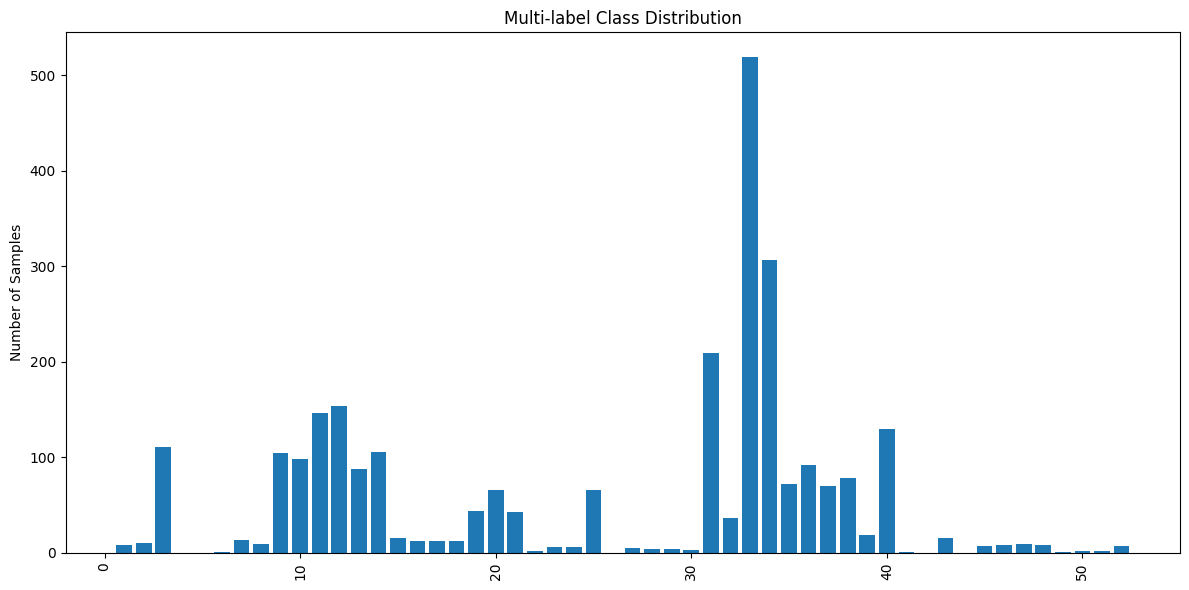

In [12]:
# Se verifica las cantidades de etiquetas para las partes multi_consolidado_encoded['partes']
mlb = MultiLabelBinarizer()
combined_labels = mlb.fit_transform(multi_consolidado_encoded['partes'])  # Puede ser usado en otros grupos de etiquetas

analyze_multilabel_class_distribution(combined_labels, class_names=mlb.classes_)

### Se muestra los datos mas humanizados:

    Etiqueta    Diccionario                         Cantidad muestras
    6:          Cerradura puerta                    1 samples
    22:         Manija derecha                      1 samples
    49:         Ventanilla delantera derecha        1 samples
    18:         Luz indicadora trasera izquierda    2 samples
    30:         Moldura puerta trasera izquierda    2 samples
    50:         Ventanilla delantera izquierda      2 samples
    51:         Ventanilla trasera derecha          2 samples
    28:         Moldura puerta delantera izquierda  3 samples
    29:         Moldura puerta trasera derecha      3 samples
    27:         Moldura puerta delantera derecha    4 samples
    1:          Antiniebla delantero derecho        5 samples
    23:         Manija izquierda                    5 samples
    45:         Ventana delantera derecha           5 samples
    8:          Espejo lateral izquierdo            6 samples
    24:         Marco de la ventana                 6 samples
    46:         Ventana delantera izquierda         6 samples
    48:         Ventana trasera izquierda           7 samples
    52:         Ventanilla trasera izquierda        7 samples
    2:          Antiniebla delantero izquierdo      8 samples
    16:         Luz indicadora delantera izquierda  8 samples
    17:         Luz indicadora trasera derecha      8 samples
    47:         Ventana trasera derecha             8 samples
    7:          Espejo lateral derecho              9 samples

23 Clases o etiquetas con menos de 10 imagenes.

Tareas: 
- Se necesita al menos 20-30 muestras por clase para modelos simples o experimentos iniciales, por esta razon se agruparan las 23 clases en una sola llamada "Otras".
- 50-100 muestras por clase para un entrenamiento más robusto y una mejor generalización, para esto se incrementaran las muestras de las imagenes.

Sugerencias:
- Más muestras siempre son mejores, especialmente para modelos de aprendizaje profundo. 

---
Trabajando con las clases raras u otras

1. Código para Procesamiento y Agrupamiento

In [13]:
# Configuración
UMBRAL_PARTES = 10      # Mínimo de muestras para no ser considerada rara
UMBRAL_DANOS = 5        # Mínimo de muestras para daños
CLASE_AGRUPADA = 999    # ID para la categoría "Otras"

def cargar_y_preparar_datos(ruta_encoded):
    """Carga y prepara los datos ya codificados"""
    df = pd.read_csv(ruta_encoded, sep='|')
    
    # Convertir strings de listas a listas reales
    for col in ['dannos', 'partes', 'sugerencias']:
        df[col] = df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    
    return df

def identificar_clases_raras(series_etiquetas, umbral):
    """Identifica clases con menos muestras que el umbral"""
    todas_etiquetas = [label for sublist in series_etiquetas for label in sublist]
    conteo = Counter(todas_etiquetas)
    return {cls for cls, count in conteo.items() if count < umbral}

def agrupar_clases_raras(etiquetas, clases_raras):
    """Reemplaza clases raras por la clase agrupada"""
    return [CLASE_AGRUPADA if label in clases_raras else label for label in etiquetas]

def procesar_y_agrupar(ruta_entrada, ruta_salida):
    """Proceso completo de agrupamiento de clases raras"""
    # Cargar datos
    df = cargar_y_preparar_datos(ruta_entrada)
    
    # Identificar clases raras
    clases_raras_piezas = identificar_clases_raras(df['partes'], UMBRAL_PARTES)
    clases_raras_danos = identificar_clases_raras(df['dannos'], UMBRAL_DANOS)
    
    print(f"Partes raras agrupadas: {clases_raras_piezas}")
    print(f"Daños raros agrupados: {clases_raras_danos}")
    
    # Aplicar agrupamiento
    df['partes'] = df['partes'].apply(lambda x: agrupar_clases_raras(x, clases_raras_piezas))
    df['dannos'] = df['dannos'].apply(lambda x: agrupar_clases_raras(x, clases_raras_danos))
    
    # Guardar resultados
    df.to_csv(ruta_salida, index=False, sep='|')
    return df

# Ejecutar el procesamiento
ruta_encoded = 'data/fotos_siniestros/clasificacion_siniestro_partes_dannos_1700_etiquetas_encoded.csv'
ruta_salida = 'data/fotos_siniestros/clasificacion_siniestro_partes_dannos_1700_etiquetas_encoded_agrupado.csv'

df_agrupado = procesar_y_agrupar(ruta_encoded, ruta_salida)

Partes raras agrupadas: {1, 6, 8, 22, 23, 24, 27, 28, 29, 30, 41, 45, 46, 47, 48, 49, 50, 51, 52}
Daños raros agrupados: set()


2. Análisis de Distribución Mejorado


Clases de partes con menos de 10 muestras:


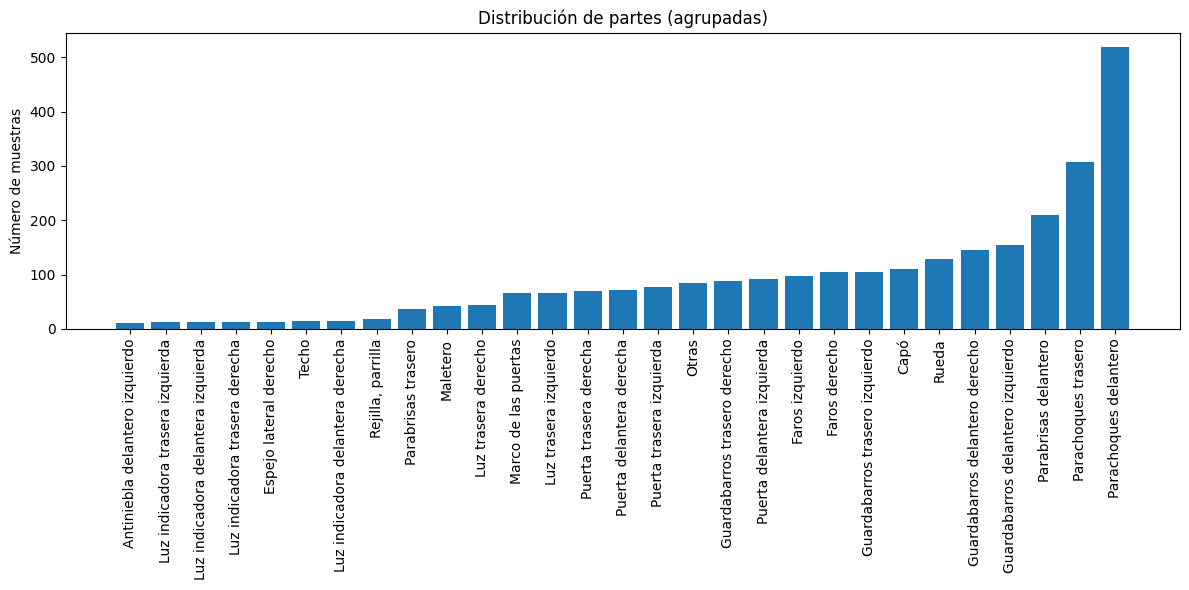


Clases de dannos con menos de 5 muestras:


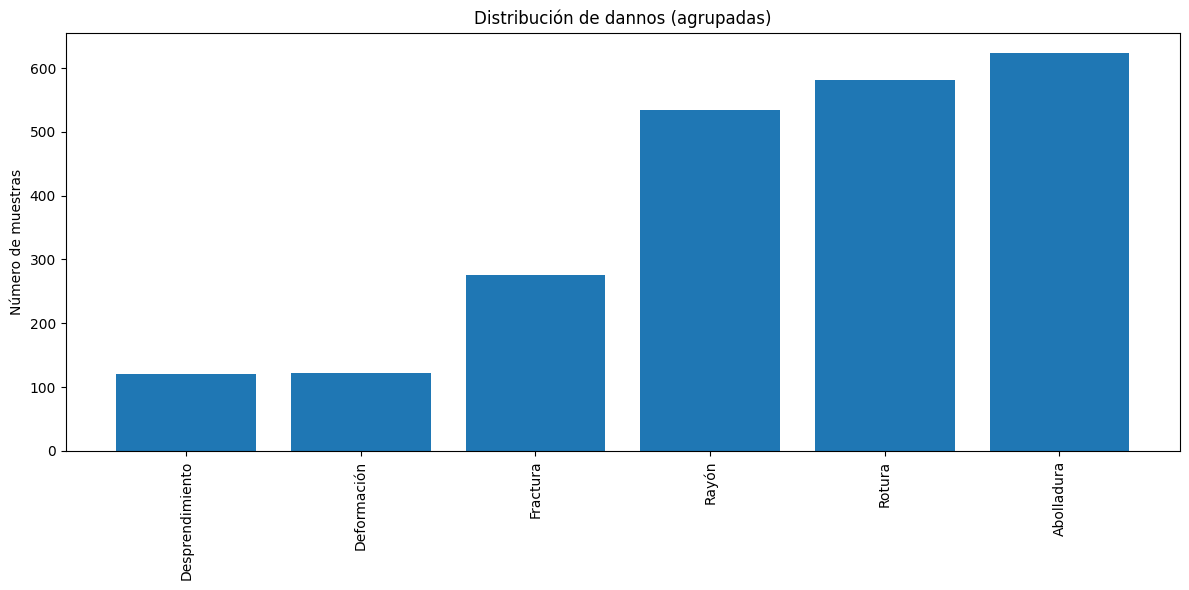

In [14]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import MultiLabelBinarizer

def analizar_distribucion(df, tipo='partes'):
    """Analiza y muestra la distribución de clases"""
    mlb = MultiLabelBinarizer()
    matriz_binaria = mlb.fit_transform(df[tipo])
    
    # Obtener nombres de clases (usando el diccionario global)
    if tipo == 'partes':
        nombres_clases = [label_to_cls_piezas.get(i, "Otras") for i in mlb.classes_]
    else:
        nombres_clases = [label_to_cls_danos.get(i, "Otros") for i in mlb.classes_]
    
    # Calcular conteos
    conteos = np.sum(matriz_binaria, axis=0)
    
    # Ordenar de menor a mayor
    indices_ordenados = np.argsort(conteos)
    conteos_ordenados = conteos[indices_ordenados]
    nombres_ordenados = [nombres_clases[i] for i in indices_ordenados]
    
    # Mostrar clases con pocas muestras
    print(f"\nClases de {tipo} con menos de {UMBRAL_PARTES if tipo=='partes' else UMBRAL_DANOS} muestras:")
    for nombre, conteo in zip(nombres_ordenados, conteos_ordenados):
        if conteo < (UMBRAL_PARTES if tipo=='partes' else UMBRAL_DANOS):
            print(f"{nombre}: {conteo} muestras")
    
    # Graficar
    plt.figure(figsize=(12, 6))
    plt.bar(nombres_ordenados, conteos_ordenados)
    plt.xticks(rotation=90)
    plt.title(f"Distribución de {tipo} (agrupadas)")
    plt.ylabel("Número de muestras")
    plt.tight_layout()
    plt.show()

# Ejecutar análisis
analizar_distribucion(df_agrupado, 'partes')
analizar_distribucion(df_agrupado, 'dannos')

3. Actualización de Diccionarios

In [15]:
# Actualizar diccionarios para incluir la clase agrupada
label_to_cls_piezas[CLASE_AGRUPADA] = "Otras partes"
cls_to_label_piezas["otras partes"] = CLASE_AGRUPADA

label_to_cls_danos[CLASE_AGRUPADA] = "Otros daños"
cls_to_label_danos["otros daños"] = CLASE_AGRUPADA

# Guardar diccionarios actualizados (opcional)
import json
with open('data/fotos_siniestros/diccionarios_actualizados.json', 'w') as f:
    json.dump({
        'label_to_cls_piezas': label_to_cls_piezas,
        'label_to_cls_danos': label_to_cls_danos,
        'cls_to_label_piezas': cls_to_label_piezas,
        'cls_to_label_danos': cls_to_label_danos
    }, f, indent=2)

4. Código para Verificación

In [16]:
def verificar_agrupamiento(df_original, df_agrupado):
    """Compara los DataFrames antes y después del agrupamiento"""
    # Ejemplo: verificar cuántas clases únicas hay ahora
    partes_unicas_orig = {x for sublist in df_original['partes'] for x in sublist}
    partes_unicas_agrup = {x for sublist in df_agrupado['partes'] for x in sublist}
    
    print("\nVerificación de agrupamiento:")
    print(f"Clases únicas originales (partes): {len(partes_unicas_orig)}")
    print(f"Clases únicas después de agrupar: {len(partes_unicas_agrup)}")
    print(f"Clases agrupadas: {CLASE_AGRUPADA in partes_unicas_agrup}")

# Cargar datos originales
df_original = cargar_y_preparar_datos(ruta_encoded)
verificar_agrupamiento(df_original, df_agrupado)


Verificación de agrupamiento:
Clases únicas originales (partes): 47
Clases únicas después de agrupar: 29
Clases agrupadas: True


La clase 999 aparecerá en tus resultados como "Otras partes" o "Otros daños"

División de Datos para Entrenamiento, Validación y Pruebas

- La naturaleza multi-etiqueta de tus datos
- La distribución de clases (que ya has analizado)
- La necesidad de mantener proporciones similares en todos los conjuntos

Alternativa más Avanzada (Recomendada)

In [18]:
# Cargar los datos ya procesados
df = pd.read_csv('data/fotos_siniestros/clasificacion_siniestro_partes_dannos_1700_etiquetas_encoded_agrupado.csv', sep='|')

In [19]:
def convert_to_serializable(obj):
    """Convierte objetos numpy a tipos nativos de Python para serialización JSON"""
    if isinstance(obj, (np.int32, np.int64)):
        return int(obj)
    elif isinstance(obj, (np.float32, np.float64)):
        return float(obj)
    elif isinstance(obj, np.ndarray):
        return obj.tolist()
    elif isinstance(obj, dict):
        return {key: convert_to_serializable(value) for key, value in obj.items()}
    elif isinstance(obj, (list, tuple)):
        return [convert_to_serializable(item) for item in obj]
    return obj

# 1. Cargar datos ya procesados
df = pd.read_csv('data/fotos_siniestros/clasificacion_siniestro_partes_dannos_1700_etiquetas_encoded_agrupado.csv', sep='|')

# Convertir strings de listas a listas reales
for col in ['dannos', 'partes', 'sugerencias']:
    df[col] = df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# 2. Preparar etiquetas para estratificación
mlb = MultiLabelBinarizer()
y_combined = np.hstack([
    mlb.fit_transform(df['dannos']),
    mlb.fit_transform(df['partes']),
    mlb.fit_transform(df['sugerencias'])
])

# 3. División estratificada
msss = MultilabelStratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, temp_index in msss.split(df, y_combined):
    train_df = df.iloc[train_index]
    temp_df = df.iloc[temp_index]

msss = MultilabelStratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
temp_labels = np.hstack([
    mlb.fit_transform(temp_df['dannos']),
    mlb.fit_transform(temp_df['partes']),
    mlb.fit_transform(temp_df['sugerencias'])
])
for val_index, test_index in msss.split(temp_df, temp_labels):
    val_df = temp_df.iloc[val_index]
    test_df = temp_df.iloc[test_index]

# 4. Crear directorios si no existen
Path('data/fotos_siniestros/train').mkdir(parents=True, exist_ok=True)
Path('data/fotos_siniestros/val').mkdir(parents=True, exist_ok=True)
Path('data/fotos_siniestros/test').mkdir(parents=True, exist_ok=True)

# 5. Guardar los conjuntos principales
train_df.to_csv('data/fotos_siniestros/train/train_set.csv', index=False, sep='|')
val_df.to_csv('data/fotos_siniestros/val/val_set.csv', index=False, sep='|')
test_df.to_csv('data/fotos_siniestros/test/test_set.csv', index=False, sep='|')

print(f"Total imágenes: {len(df)}")
print(f"Entrenamiento: {len(train_df)} ({len(train_df)/len(df)*100:.1f}%)")
print(f"Validación: {len(val_df)} ({len(val_df)/len(df)*100:.1f}%)")
print(f"Prueba: {len(test_df)} ({len(test_df)/len(df)*100:.1f}%)")

# 6. Guardar metadatos y clases raras
def get_rare_classes(df, column, threshold=5):
    all_labels = [label for sublist in df[column] for label in sublist]
    label_counts = pd.Series(all_labels).value_counts()
    return label_counts[label_counts < threshold].index.tolist()

# Modifica la creación del diccionario metadata para usar la función de conversión
metadata = {
    'split_parameters': {
        'test_size': 0.3,
        'val_size': 0.15,
        'random_state': 42,
        'stratify': True
    },
    'rare_classes': {
        'dannos': convert_to_serializable(get_rare_classes(df, 'dannos')),
        'partes': convert_to_serializable(get_rare_classes(df, 'partes')),
        'sugerencias': convert_to_serializable(get_rare_classes(df, 'sugerencias'))
    },
    'class_distribution': {
        'original': {
            'n_images': len(df),
            'class_counts': {
                'dannos': convert_to_serializable(dict(pd.Series(label for sublist in df['dannos'] for label in sublist).value_counts())),
                'partes': convert_to_serializable(dict(pd.Series(label for sublist in df['partes'] for label in sublist).value_counts())),
                'sugerencias': convert_to_serializable(dict(pd.Series(label for sublist in df['sugerencias'] for label in sublist).value_counts()))
            }
        },
        'train': {
            'n_images': len(train_df),
            'class_counts': {
                'dannos': convert_to_serializable(dict(pd.Series(label for sublist in train_df['dannos'] for label in sublist).value_counts())),
                'partes': convert_to_serializable(dict(pd.Series(label for sublist in train_df['partes'] for label in sublist).value_counts())),
                'sugerencias': convert_to_serializable(dict(pd.Series(label for sublist in train_df['sugerencias'] for label in sublist).value_counts()))
            }
        },
        'val': {
            'n_images': len(val_df),
            'class_counts': {
                'dannos': convert_to_serializable(dict(pd.Series(label for sublist in val_df['dannos'] for label in sublist).value_counts())),
                'partes': convert_to_serializable(dict(pd.Series(label for sublist in val_df['partes'] for label in sublist).value_counts())),
                'sugerencias': convert_to_serializable(dict(pd.Series(label for sublist in val_df['sugerencias'] for label in sublist).value_counts()))
            }
        },
        'test': {
            'n_images': len(test_df),
            'class_counts': {
                'dannos': convert_to_serializable(dict(pd.Series(label for sublist in test_df['dannos'] for label in sublist).value_counts())),
                'partes': convert_to_serializable(dict(pd.Series(label for sublist in test_df['partes'] for label in sublist).value_counts())),
                'sugerencias': convert_to_serializable(dict(pd.Series(label for sublist in test_df['sugerencias'] for label in sublist).value_counts()))
            }
        }
    }
}

# 7. Crear archivos de soporte para clases raras
def create_support_files(df, split_name):
    # Crear directorio si no existe
    os.makedirs(f'data/fotos_siniestros/{split_name}', exist_ok=True)
    
    rare_partes = get_rare_classes(df, 'partes')
    rare_dannos = get_rare_classes(df, 'dannos')
    
    support_data = {
        'rare_partes': rare_partes,
        'rare_partes_names': [label_to_cls_piezas.get(x, "Desconocido") for x in rare_partes],
        'rare_dannos': rare_dannos,
        'rare_dannos_names': [label_to_cls_danos.get(x, "Desconocido") for x in rare_dannos],
        'examples': {
            'partes': df[df['partes'].apply(lambda x: any(item in rare_partes for item in x))].head(5).to_dict('records'),
            'dannos': df[df['dannos'].apply(lambda x: any(item in rare_dannos for item in x))].head(5).to_dict('records')
        }
    }
    
    with open(f'data/fotos_siniestros/{split_name}/rare_classes_support.json', 'w') as f:
        json.dump(support_data, f, indent=2)

# Asegurarse que el directorio principal existe
os.makedirs('data/fotos_siniestros', exist_ok=True)

# Guardar metadatos
with open('data/fotos_siniestros/split_metadata.json', 'w') as f:
    json.dump(convert_to_serializable(metadata), f, indent=2)

# Crear archivos de soporte
create_support_files(train_df, 'train')
create_support_files(val_df, 'val')
create_support_files(test_df, 'test')

print("División completada y archivos guardados correctamente.")

Total imágenes: 1700
Entrenamiento: 1186 (69.8%)
Validación: 254 (14.9%)
Prueba: 260 (15.3%)
División completada y archivos guardados correctamente.


Tamaño de los Conjuntos:

- 70% entrenamiento
- 15% validación (para ajuste de hiperparámetros)
- 15% prueba (solo para evaluación final)

Implementación Mejorada con Guardado de Metadatos

1. Reproducibilidad: Se podrá recrear exactamente los mismos conjuntos en cualquier momento
2. Trazabilidad: Se sabrá qué imágenes pertenecen a cada conjunto
3. Flexibilidad: Se podrás cargar solo los conjuntos que necesites para cada fase

In [20]:
# Usar MultilabelStratifiedShuffleSplit para mejor estratificación
msss = MultilabelStratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# Primera división: train (70%) y temp (30%)
for train_index, temp_index in msss.split(df['Imagen'], y_combined):
    X_train = df.iloc[train_index]['Imagen']
    X_temp = df.iloc[temp_index]['Imagen']
    y_temp_labels = y_combined[temp_index]

# Segunda división: val (15%) y test (15%)
msss = MultilabelStratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for val_index, test_index in msss.split(X_temp, y_temp_labels):
    X_val = X_temp.iloc[val_index]
    X_test = X_temp.iloc[test_index]

# Crear DataFrames
train_df = df[df['Imagen'].isin(X_train)].copy()
val_df = df[df['Imagen'].isin(X_val)].copy()
test_df = df[df['Imagen'].isin(X_test)].copy()

# Verificar distribución
def check_distribution(df, name):
    print(f"\nDistribución en {name}:")
    for col in ['dannos', 'partes', 'sugerencias']:
        all_labels = [label for sublist in df[col] for label in sublist]
        print(f"{col}: {len(set(all_labels))} clases únicas, {len(all_labels)} etiquetas totales")

check_distribution(train_df, "Entrenamiento")
check_distribution(val_df, "Validación")
check_distribution(test_df, "Prueba")


Distribución en Entrenamiento:
dannos: 6 clases únicas, 1924 etiquetas totales
partes: 29 clases únicas, 1924 etiquetas totales
sugerencias: 2 clases únicas, 1924 etiquetas totales

Distribución en Validación:
dannos: 6 clases únicas, 412 etiquetas totales
partes: 29 clases únicas, 412 etiquetas totales
sugerencias: 2 clases únicas, 412 etiquetas totales

Distribución en Prueba:
dannos: 6 clases únicas, 409 etiquetas totales
partes: 29 clases únicas, 409 etiquetas totales
sugerencias: 2 clases únicas, 409 etiquetas totales


---
Metadatos, permiten guardar información sobre los datos, 

Esto permite guardar en un metadata la informacion de los datos, como por ejemplo la distribución de las etiquetas de dannos, partes y sugerencias, cantidad de imagenes, etc.

Ejemplo para cargar los conjuntos:

In [21]:
train_df = pd.read_csv('data/fotos_siniestros/train/train_set.csv', sep='|')
val_df = pd.read_csv('data/fotos_siniestros/val/val_set.csv', sep='|')

Cargar metadatos:

In [22]:
import json
try:
    with open('data/fotos_siniestros/split_metadata.json') as f:
        metadata = json.load(f)
    print(metadata)
except FileNotFoundError:
    print("The file 'split_metadata.json' was not found.")
except json.JSONDecodeError:
    print("The file 'split_metadata.json' is not a valid JSON file.")
except Exception as e:
    print(f"An error occurred: {e}")


{'split_parameters': {'test_size': 0.3, 'val_size': 0.15, 'random_state': 42, 'stratify': True}, 'rare_classes': {'dannos': [], 'partes': [], 'sugerencias': []}, 'class_distribution': {'original': {'n_images': 1700, 'class_counts': {'dannos': {'1': 863, '6': 677, '5': 604, '4': 316, '2': 153, '3': 132}, 'partes': {'33': 521, '34': 308, '31': 209, '12': 156, '11': 147, '40': 129, '3': 111, '14': 105, '9': 104, '10': 98, '999': 93, '36': 92, '13': 88, '38': 78, '35': 72, '37': 71, '20': 66, '25': 66, '19': 44, '21': 43, '32': 36, '39': 19, '15': 15, '43': 15, '7': 13, '17': 12, '16': 12, '18': 12, '2': 10}, 'sugerencias': {'1': 1878, '2': 867}}}, 'train': {'n_images': 1186, 'class_counts': {'dannos': {'1': 610, '6': 470, '5': 423, '4': 220, '2': 105, '3': 96}, 'partes': {'33': 369, '34': 215, '31': 145, '12': 109, '11': 102, '40': 90, '3': 78, '14': 74, '9': 73, '10': 69, '999': 66, '36': 64, '13': 62, '38': 55, '37': 50, '35': 50, '20': 46, '25': 46, '19': 31, '21': 30, '32': 25, '39': 

Graficar los datos que trae el metadato.

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


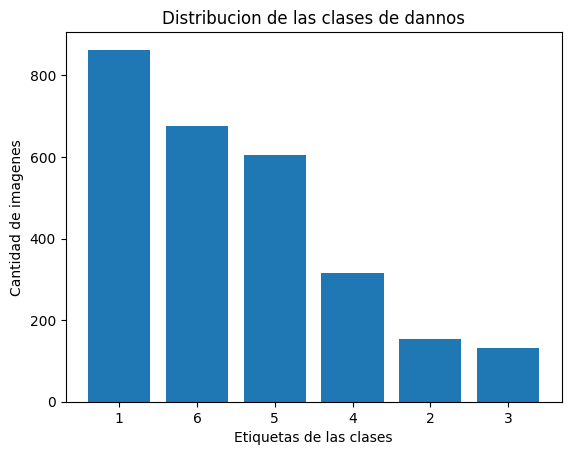

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


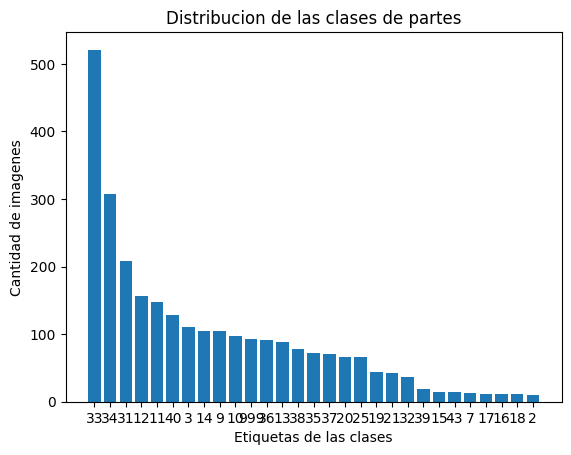

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


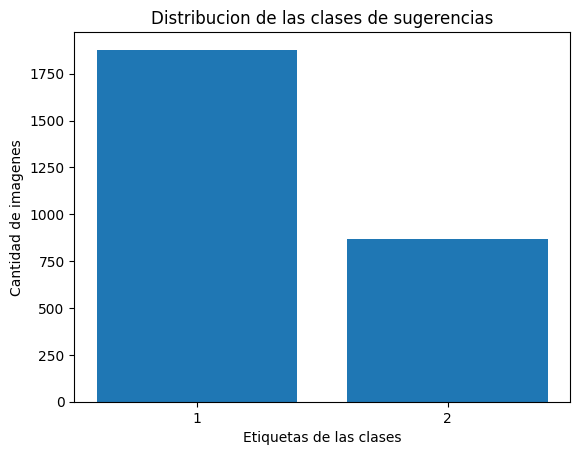

In [23]:
import json
import matplotlib.pyplot as plt
try:
    with open('data/fotos_siniestros/split_metadata.json') as f:
        metadata = json.load(f)
    # Create a bar chart of class distribution
    class_counts = metadata['class_distribution']['original']['class_counts']
    for class_name, counts in class_counts.items():
        plt.bar(counts.keys(), counts.values())
        plt.xlabel('Etiquetas de las clases')
        plt.ylabel('Cantidad de imagenes')
        plt.title(f'Distribucion de las clases de {class_name}')
        plt.show()
except FileNotFoundError:
    print("El archivo 'split_metadata.json' no fue encontrado.")
except json.JSONDecodeError:
    print("El archivo 'split_metadata.json' no tiene un formato JSON valido.")
except Exception as e:
    print(f"Ha ocurrido un error: {e}")

---
Manejar clases raras:

In [23]:
import json
try:
    with open('data/fotos_siniestros/test/rare_classes_support.json') as f:
        metadata = json.load(f)
    print(metadata)
except FileNotFoundError:
    print("The file 'rare_classes_support.json' was not found.")
except json.JSONDecodeError:
    print("The file 'rare_classes_support.json' is not a valid JSON file.")
except Exception as e:
    print(f"An error occurred: {e}")

{'rare_partes': [39, 43, 17, 15, 7], 'rare_partes_names': ['Rejilla, parrilla', 'Techo', 'Luz indicadora trasera derecha', 'Luz indicadora delantera derecha', 'Espejo lateral derecho'], 'rare_dannos': [], 'rare_dannos_names': [], 'examples': {'partes': [{'Imagen': '1126.jpg', 'dannos': [1, 1], 'partes': [43, 999], 'sugerencias': [1, 1]}, {'Imagen': '1467.jpg', 'dannos': [4, 4], 'partes': [19, 17], 'sugerencias': [2, 2]}, {'Imagen': '1485.jpg', 'dannos': [4, 4, 4, 3], 'partes': [31, 9, 10, 39], 'sugerencias': [2, 2, 2, 2]}, {'Imagen': '15.jpg', 'dannos': [6, 6, 6, 6], 'partes': [9, 33, 11, 15], 'sugerencias': [2, 1, 1, 2]}, {'Imagen': '1534.jpg', 'dannos': [6, 6], 'partes': [19, 17], 'sugerencias': [2, 2]}], 'dannos': []}}


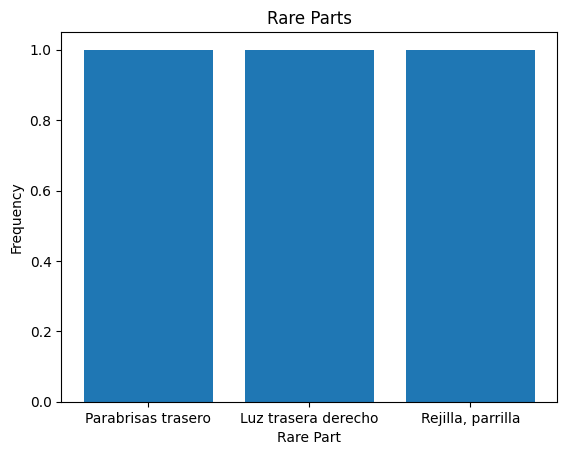

In [24]:
#**1. Bar chart of rare parts**
import matplotlib.pyplot as plt

rare_partes = [32, 19, 39]
rare_partes_names = ['Parabrisas trasero', 'Luz trasera derecho', 'Rejilla, parrilla']

plt.bar(rare_partes_names, [1]*len(rare_partes_names))
plt.xlabel('Rare Part')
plt.ylabel('Frequency')
plt.title('Rare Parts')
plt.show()

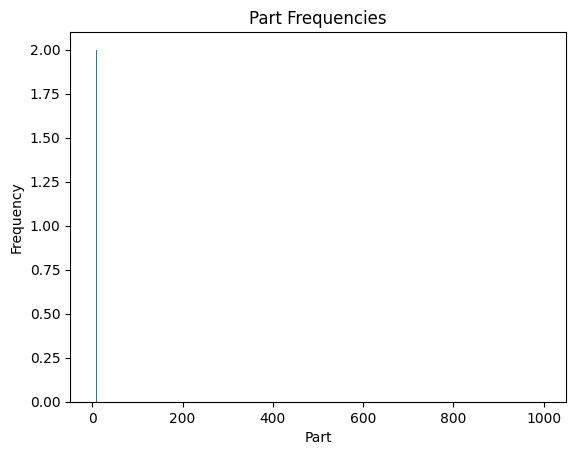

In [25]:
#**2. Histogram of part frequencies**
import matplotlib.pyplot as plt

partes = [example['partes'] for example in metadata['examples']['partes']]
partes_flat = [part for sublist in partes for part in sublist]

plt.hist(partes_flat, bins=range(1, max(partes_flat)+2), align='left', rwidth=0.8)
plt.xlabel('Part')
plt.ylabel('Frequency')
plt.title('Part Frequencies')
plt.show()

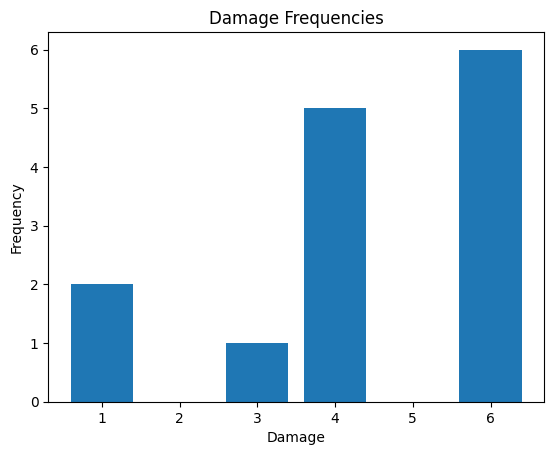

In [26]:
#**3. Bar chart of damage frequencies**
import matplotlib.pyplot as plt

dannos = [example['dannos'] for example in metadata['examples']['partes']]
dannos_flat = [danno for sublist in dannos for danno in sublist]

plt.bar(range(1, max(dannos_flat)+1), [dannos_flat.count(i) for i in range(1, max(dannos_flat)+1)])
plt.xlabel('Damage')
plt.ylabel('Frequency')
plt.title('Damage Frequencies')
plt.show()

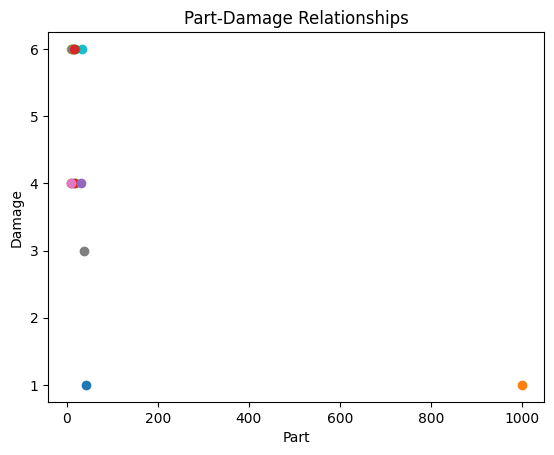

In [27]:
#**4. Scatter plot of part-damage relationships**
import matplotlib.pyplot as plt

partes = [example['partes'] for example in metadata['examples']['partes']]
dannos = [example['dannos'] for example in metadata['examples']['partes']]

for i in range(len(partes)):
    for j in range(len(partes[i])):
        plt.scatter(partes[i][j], dannos[i][j])

plt.xlabel('Part')
plt.ylabel('Damage')
plt.title('Part-Damage Relationships')
plt.show()

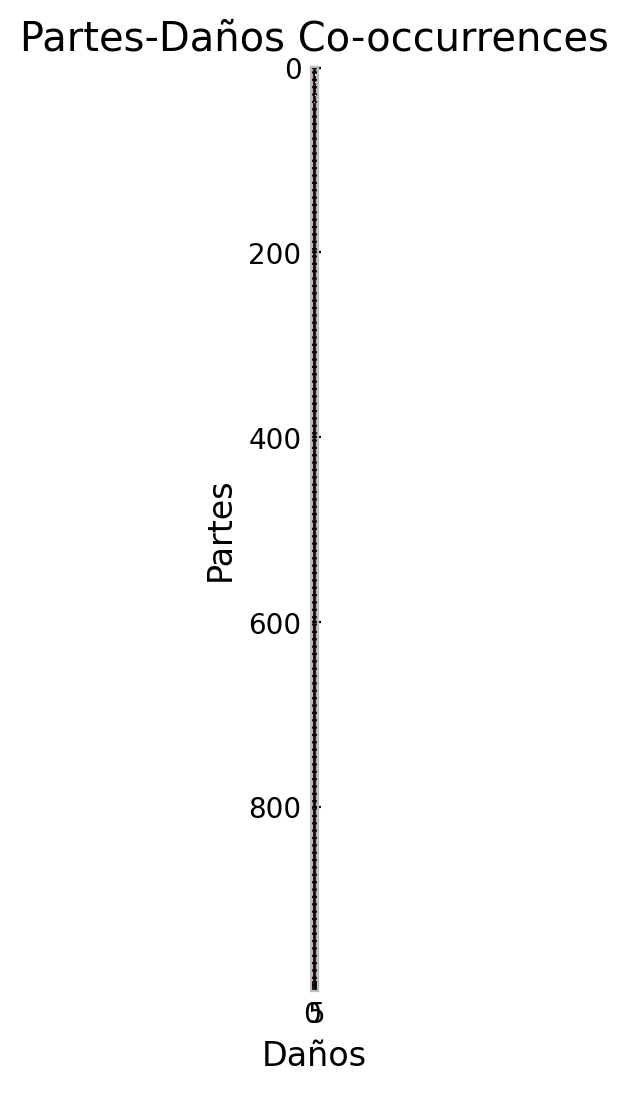

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
partes = [example['partes'] for example in metadata['examples']['partes']]
dannos = [example['dannos'] for example in metadata['examples']['partes']]

co_occurrences = {}
for i in range(len(partes)):
    for j in range(len(partes[i])):
        key = (partes[i][j], dannos[i][j])
        if key in co_occurrences:
            co_occurrences[key] += 1
        else:
            co_occurrences[key] = 1
# Convert the dictionary to a sparse matrix
rows = [key[0] for key in co_occurrences.keys()]
cols = [key[1] for key in co_occurrences.keys()]
data = list(co_occurrences.values())
max_part = max(rows)
max_danno = max(cols)
matrix = csr_matrix((data, (rows, cols)), shape=(max_part + 1, max_danno + 1))
plt.style.use('bmh')  # Cambia el estilo del gráfico
plt.figure(figsize=(10, 6), dpi=200)  # Aumenta la resolución de la imagen
plt.imshow(matrix.toarray(), cmap='hot', interpolation='nearest')
plt.xlabel('Daños')
plt.ylabel('Partes')
plt.title('Partes-Daños Co-occurrences')
# plt.xticks([0, 1, 2, 3, 4])  # Ajusta la escala del eje x
# plt.yticks([0, 1, 2, 3, 4])  # Ajusta la escala del eje y
plt.show()

Este gráfico es un heatmap que muestra la frecuencia de co-ocurrencia entre diferentes partes y daños en un vehículo.

Cada parte del gráfico:

Eje x (Daños): Representa los diferentes tipos de daños que pueden ocurrir en un vehículo. Cada valor en el eje x corresponde a un tipo de daño específico.

Eje y (Partes): Representa las diferentes partes de un vehículo que pueden ser afectadas por un daño. Cada valor en el eje y corresponde a una parte específica del vehículo.

Colores: Los colores en el heatmap representan la frecuencia de co-ocurrencia entre una parte y un daño. Los colores más oscuros indican una frecuencia de co-ocurrencia más alta, mientras que los colores más claros indican una frecuencia de co-ocurrencia más baja.

Valores: Los valores en el heatmap representan la frecuencia de co-ocurrencia entre una parte y un daño. Por ejemplo, si el valor en la posición (3, 5) es 10, significa que la parte 3 y el daño 5 han ocurrido juntos 10 veces en el conjunto de datos.

Al analizar este gráfico, se puede obtener información valiosa sobre la relación entre las partes y los daños en un vehículo. Por ejemplo:

1. Patrones de co-ocurrencia: Puedes identificar patrones de co-ocurrencia entre diferentes partes y daños. Por ejemplo, si notas que la parte 3 y el daño 5 siempre ocurren juntos, puede indicar que hay una relación causal entre ellos.
2. Frecuencia de daños: Puedes ver la frecuencia de cada tipo de daño en el conjunto de datos. Por ejemplo, si el daño 5 es el más común, puede indicar que es un problema crítico que requiere atención.
3. Vulnerabilidad de las partes: Puedes ver la vulnerabilidad de cada parte del vehículo a diferentes tipos de daños. Por ejemplo, si la parte 3 es más propensa a sufrir daños que la parte 2, puede indicar que la parte 3 requiere más atención y mantenimiento.

En resumen, este gráfico te permite analizar la relación entre las partes y los daños en un vehículo, lo que puede ayudar a identificar patrones y tendencias que pueden informar decisiones de mantenimiento y reparación.

---

Opcional, solo para pruebas de visualizacion de graficos.

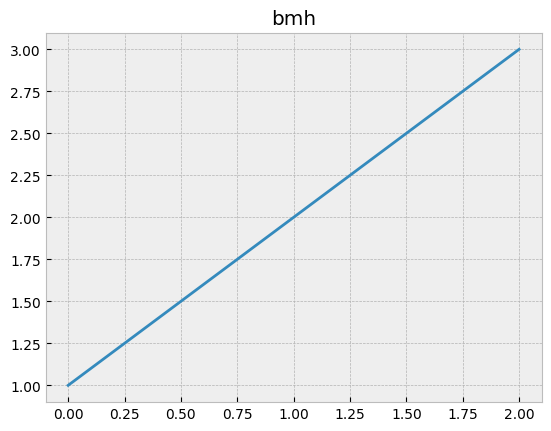

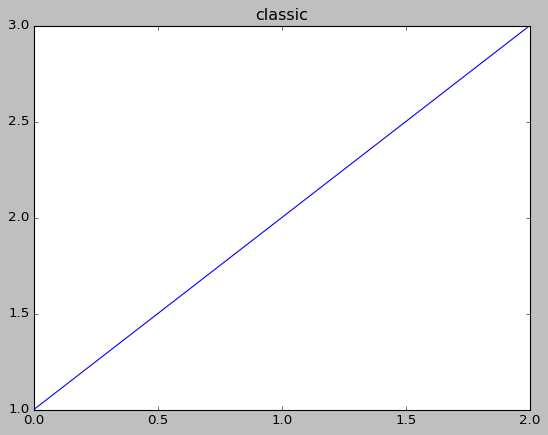

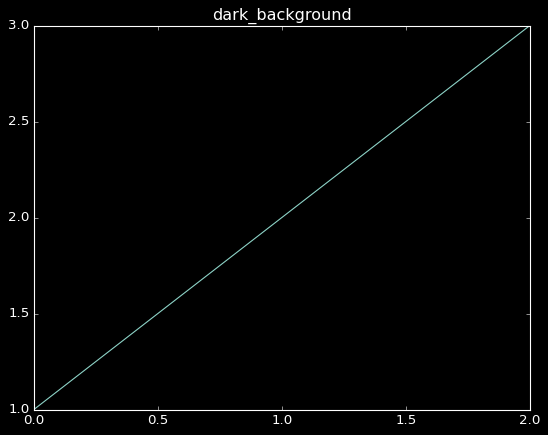

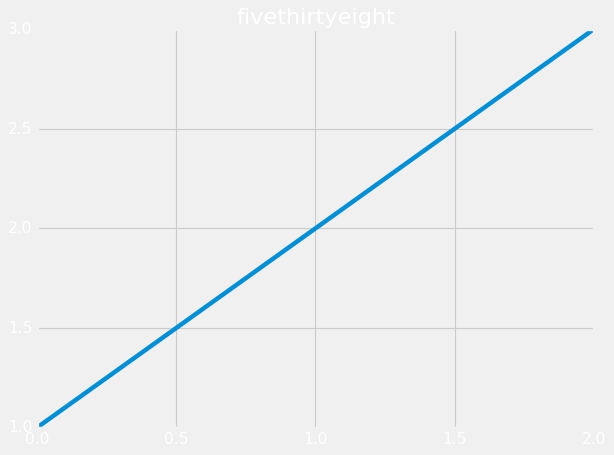

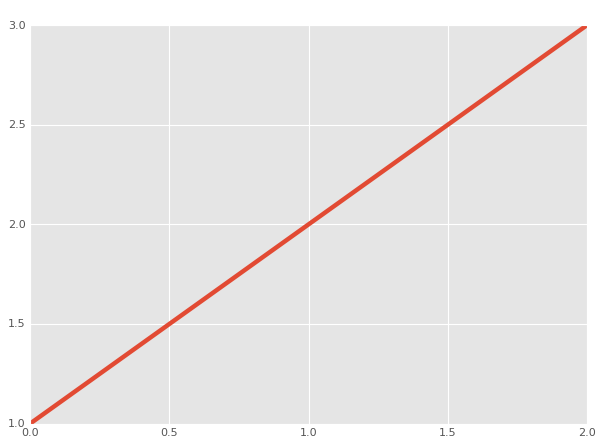

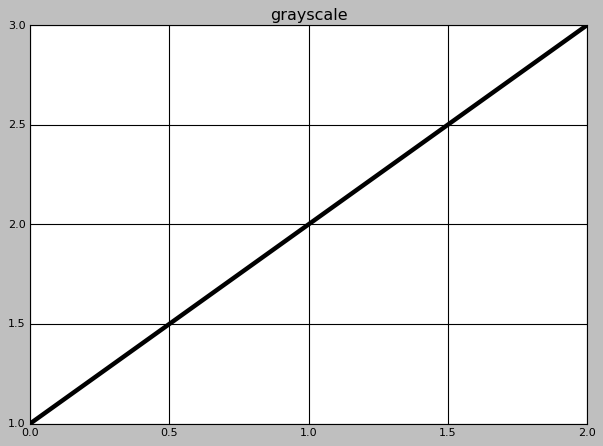

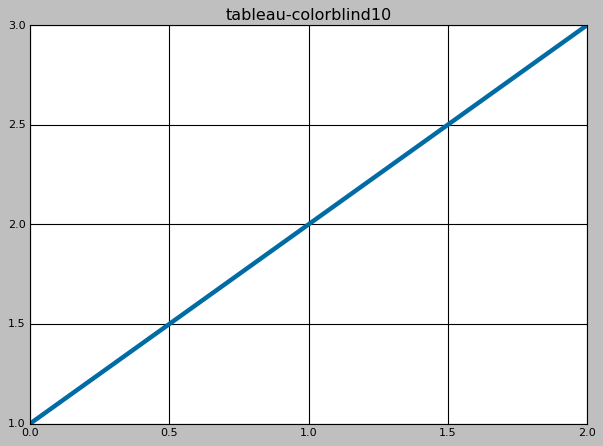

In [29]:
import matplotlib.pyplot as plt
estilos = ['bmh', 'classic', 'dark_background', 'fivethirtyeight', 'ggplot', 'grayscale', 'tableau-colorblind10']
for estilo in estilos:
    plt.style.use(estilo)
    plt.plot([1, 2, 3])
    plt.title(estilo)
    plt.show()

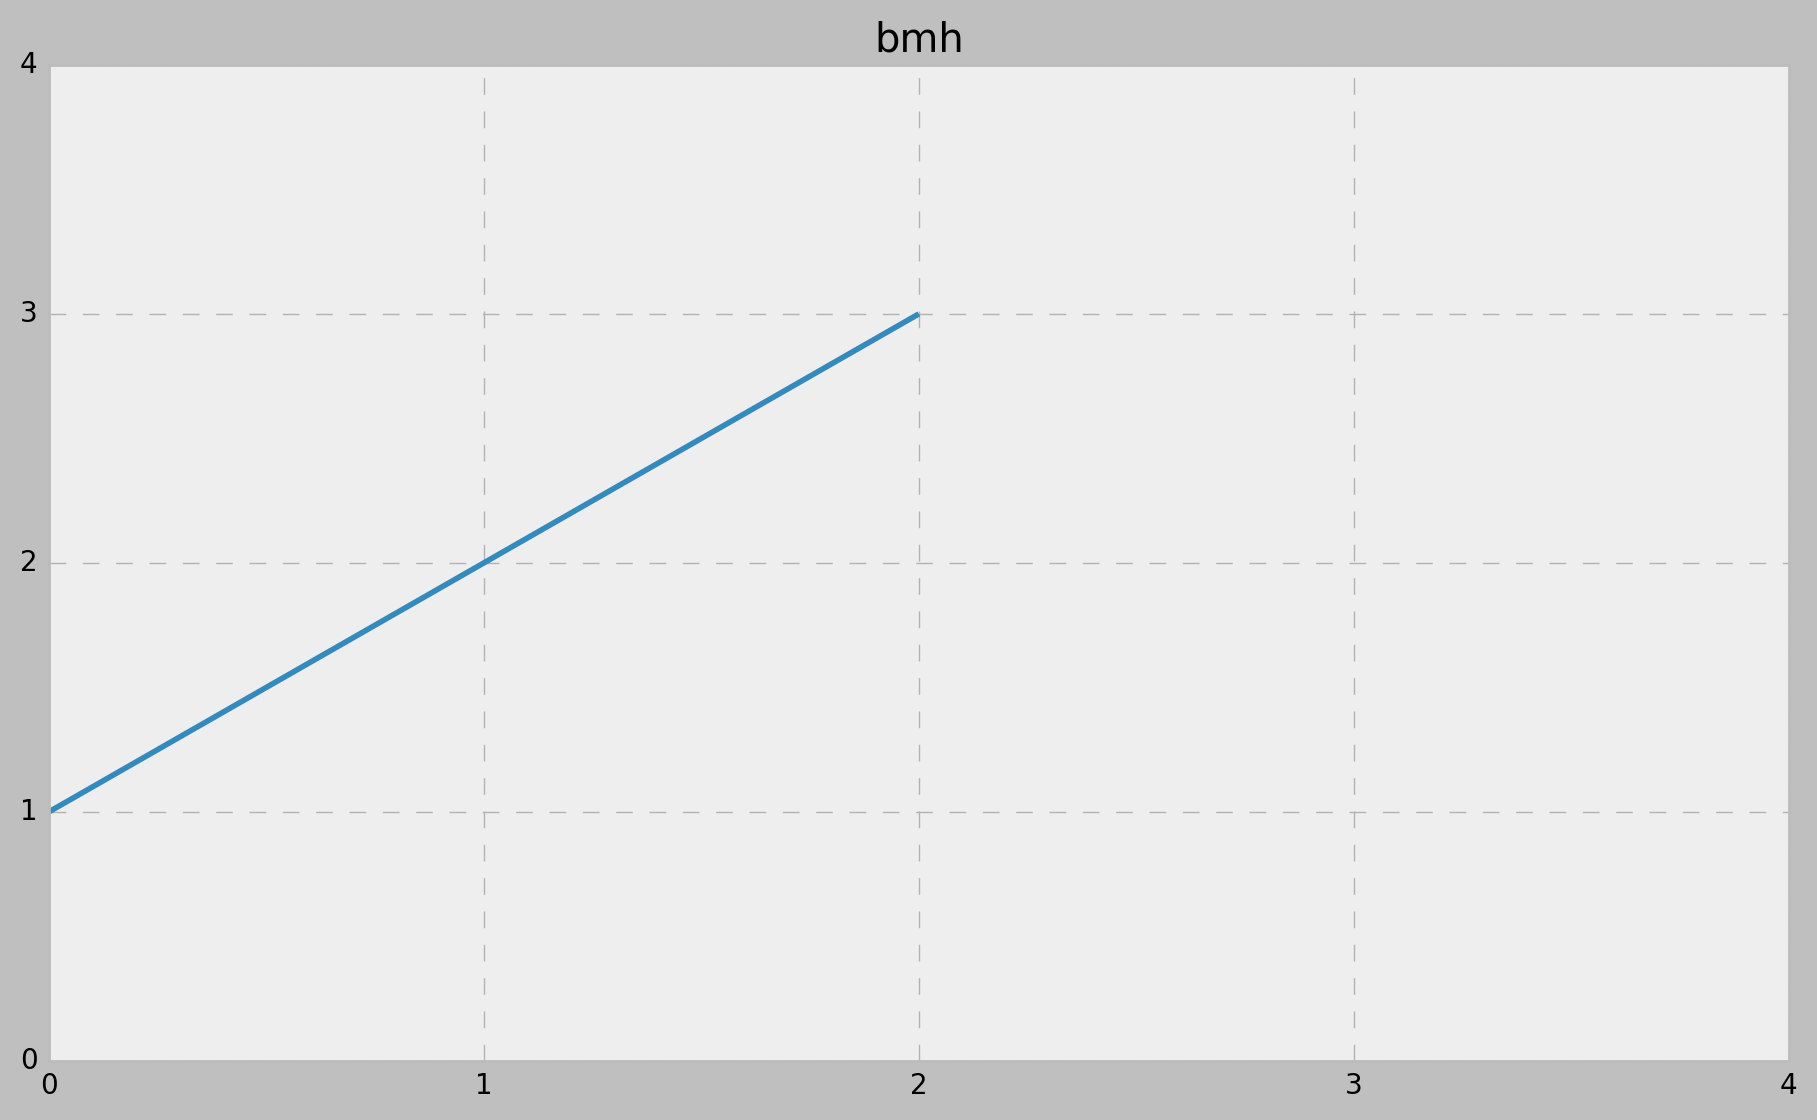

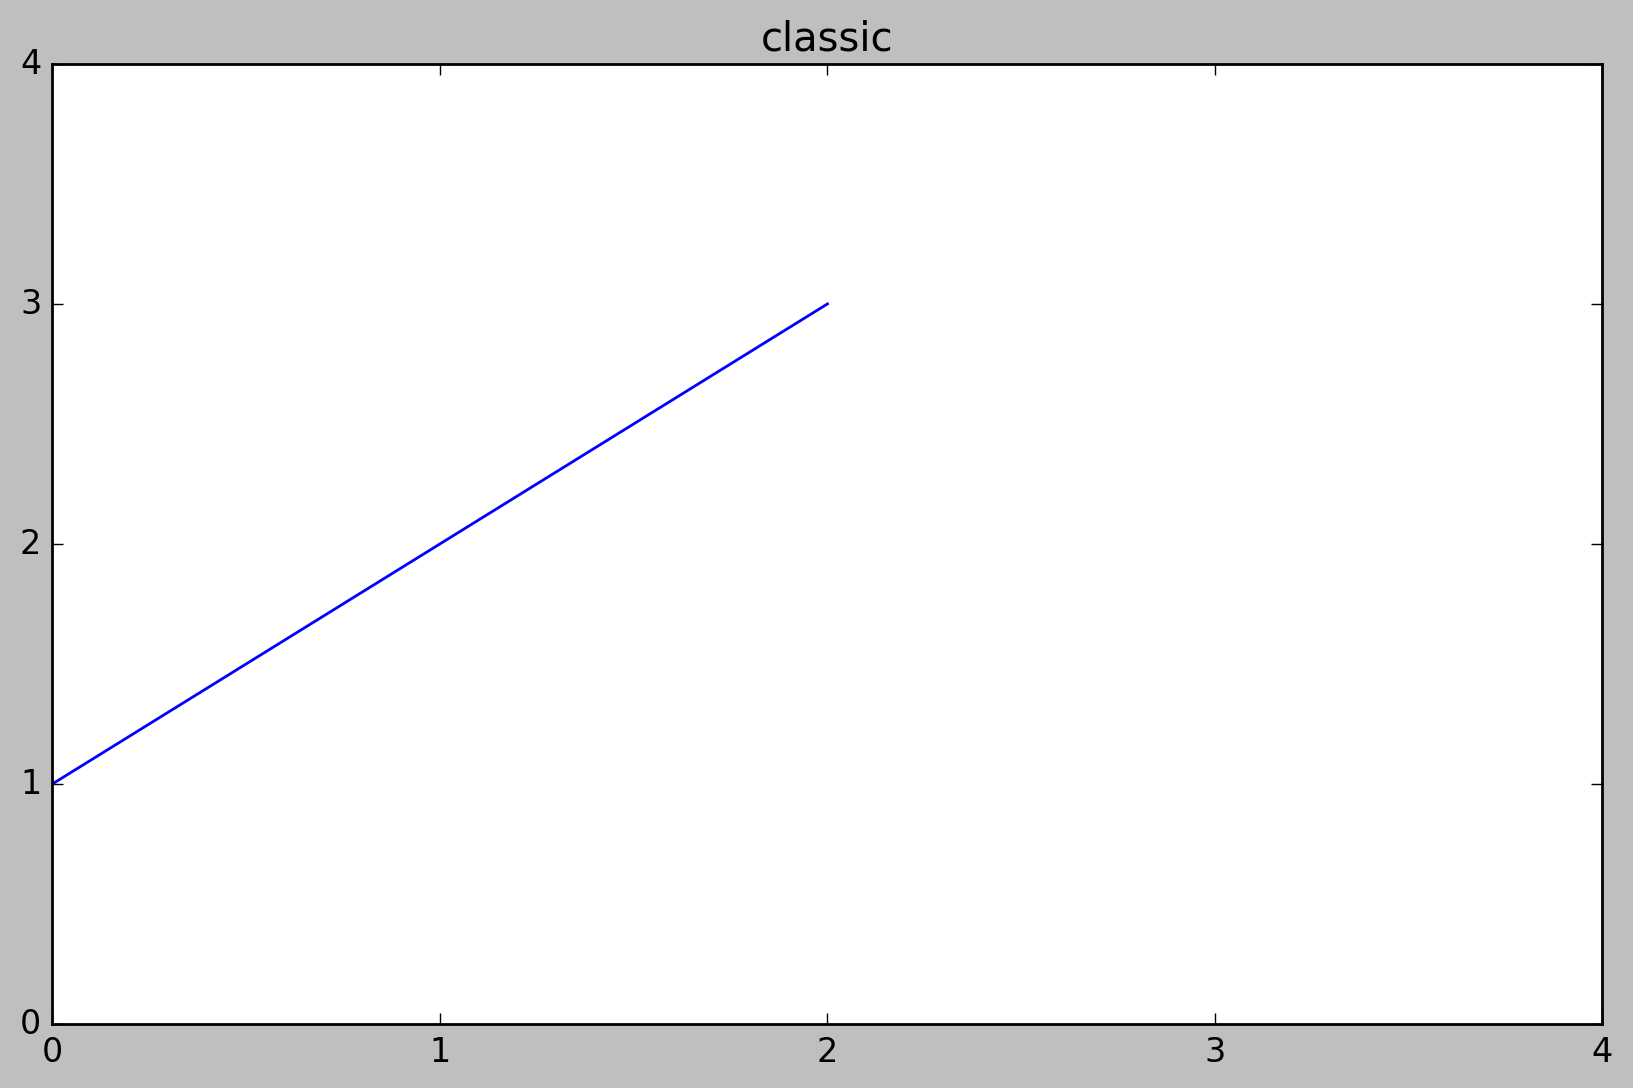

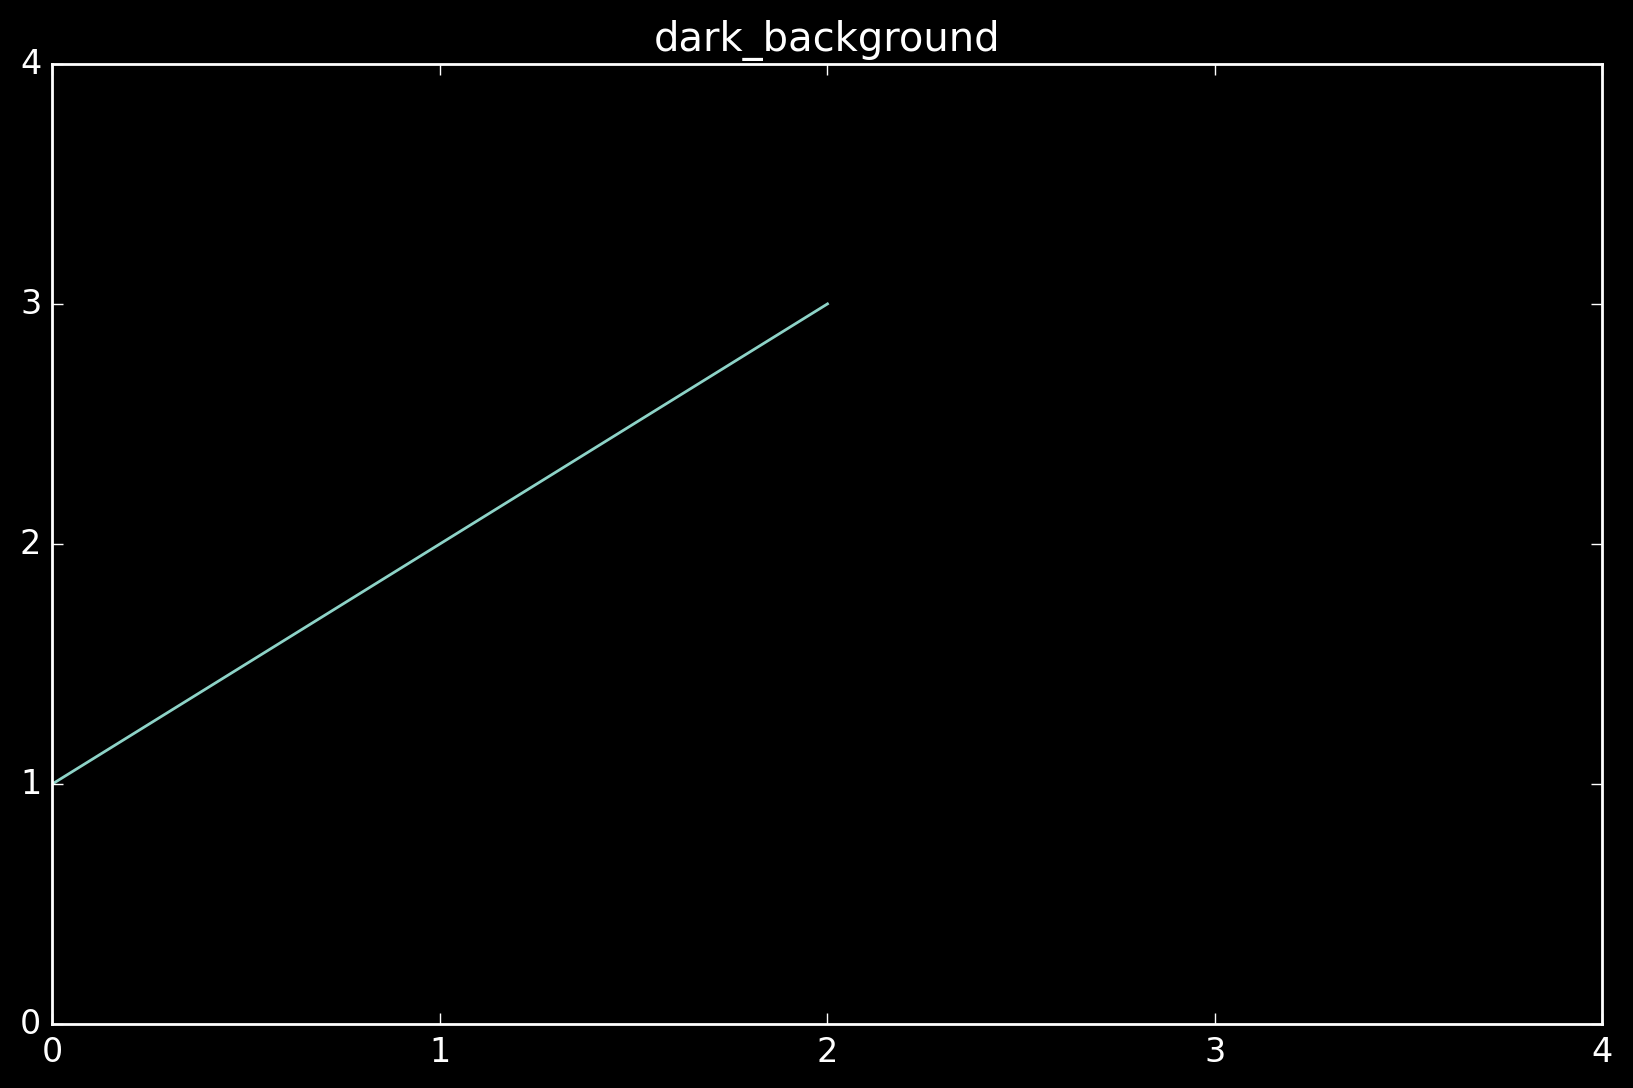

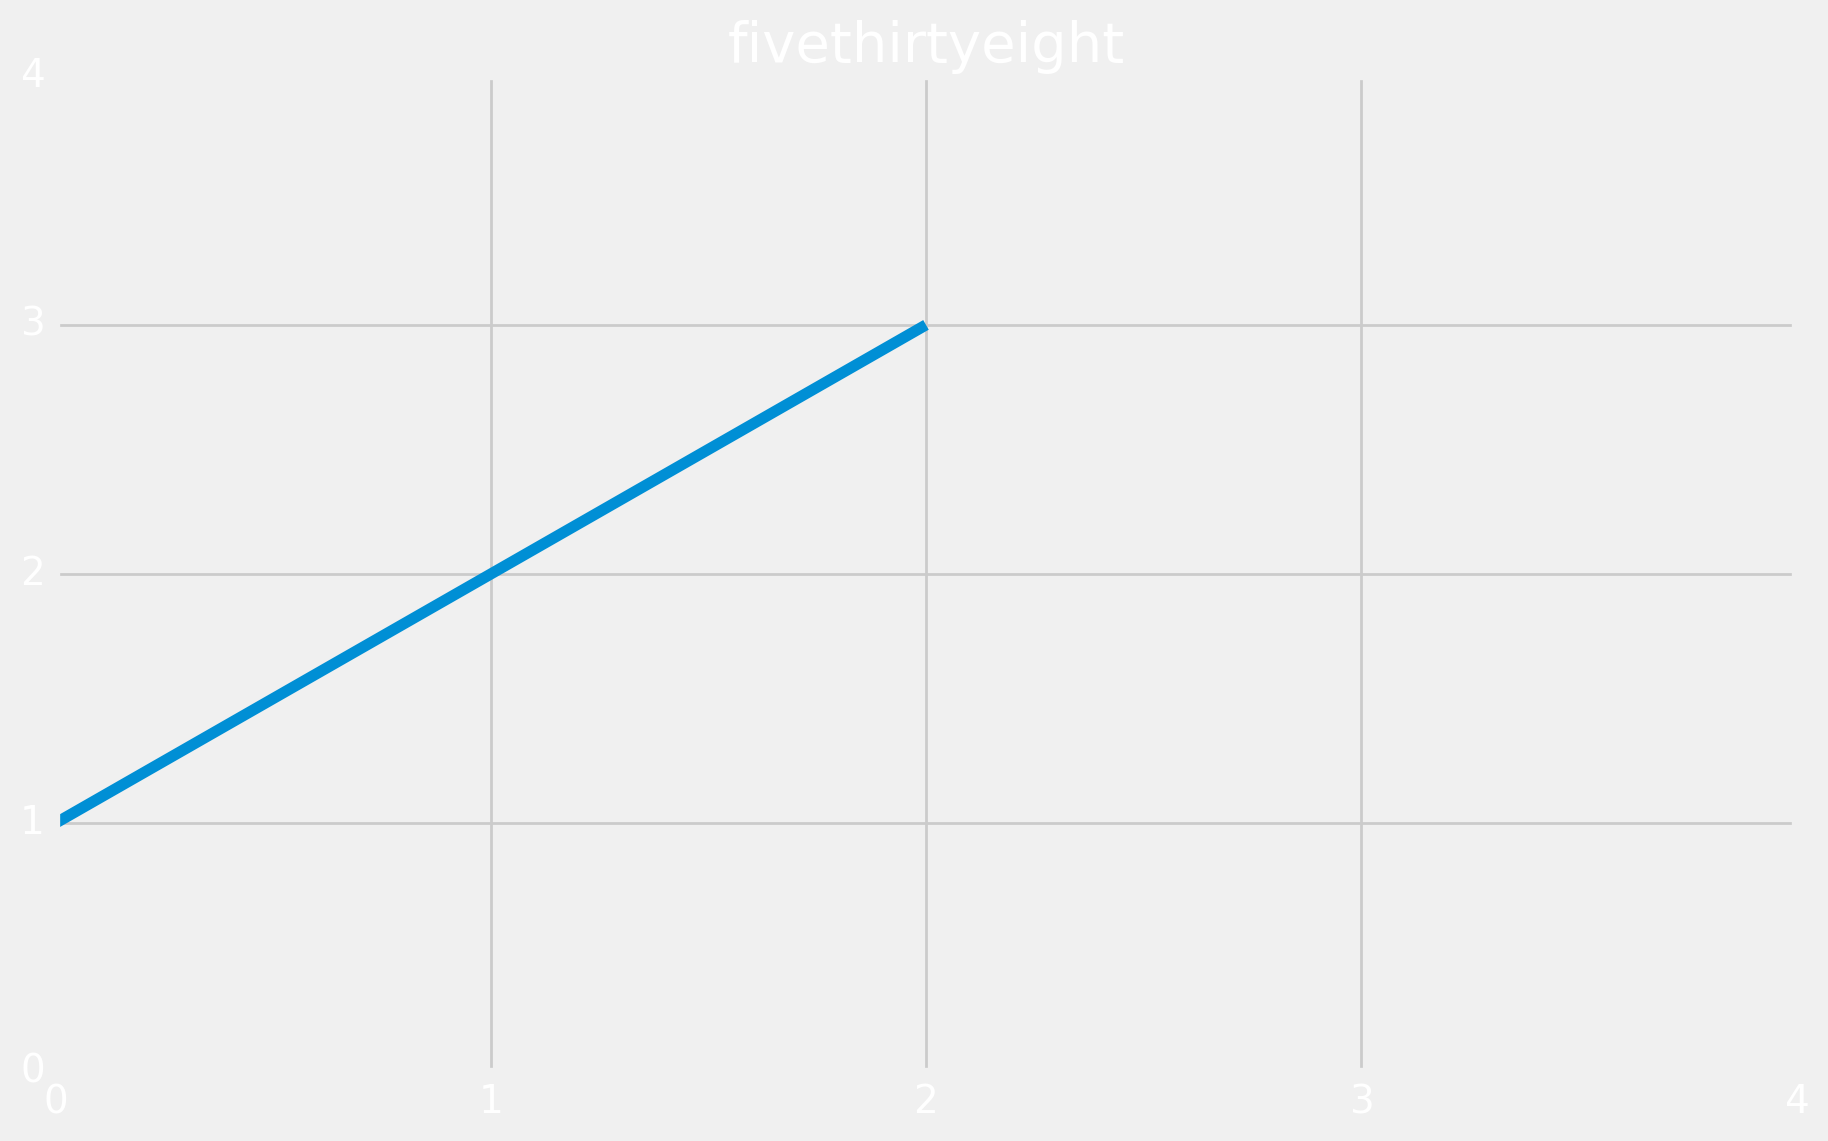

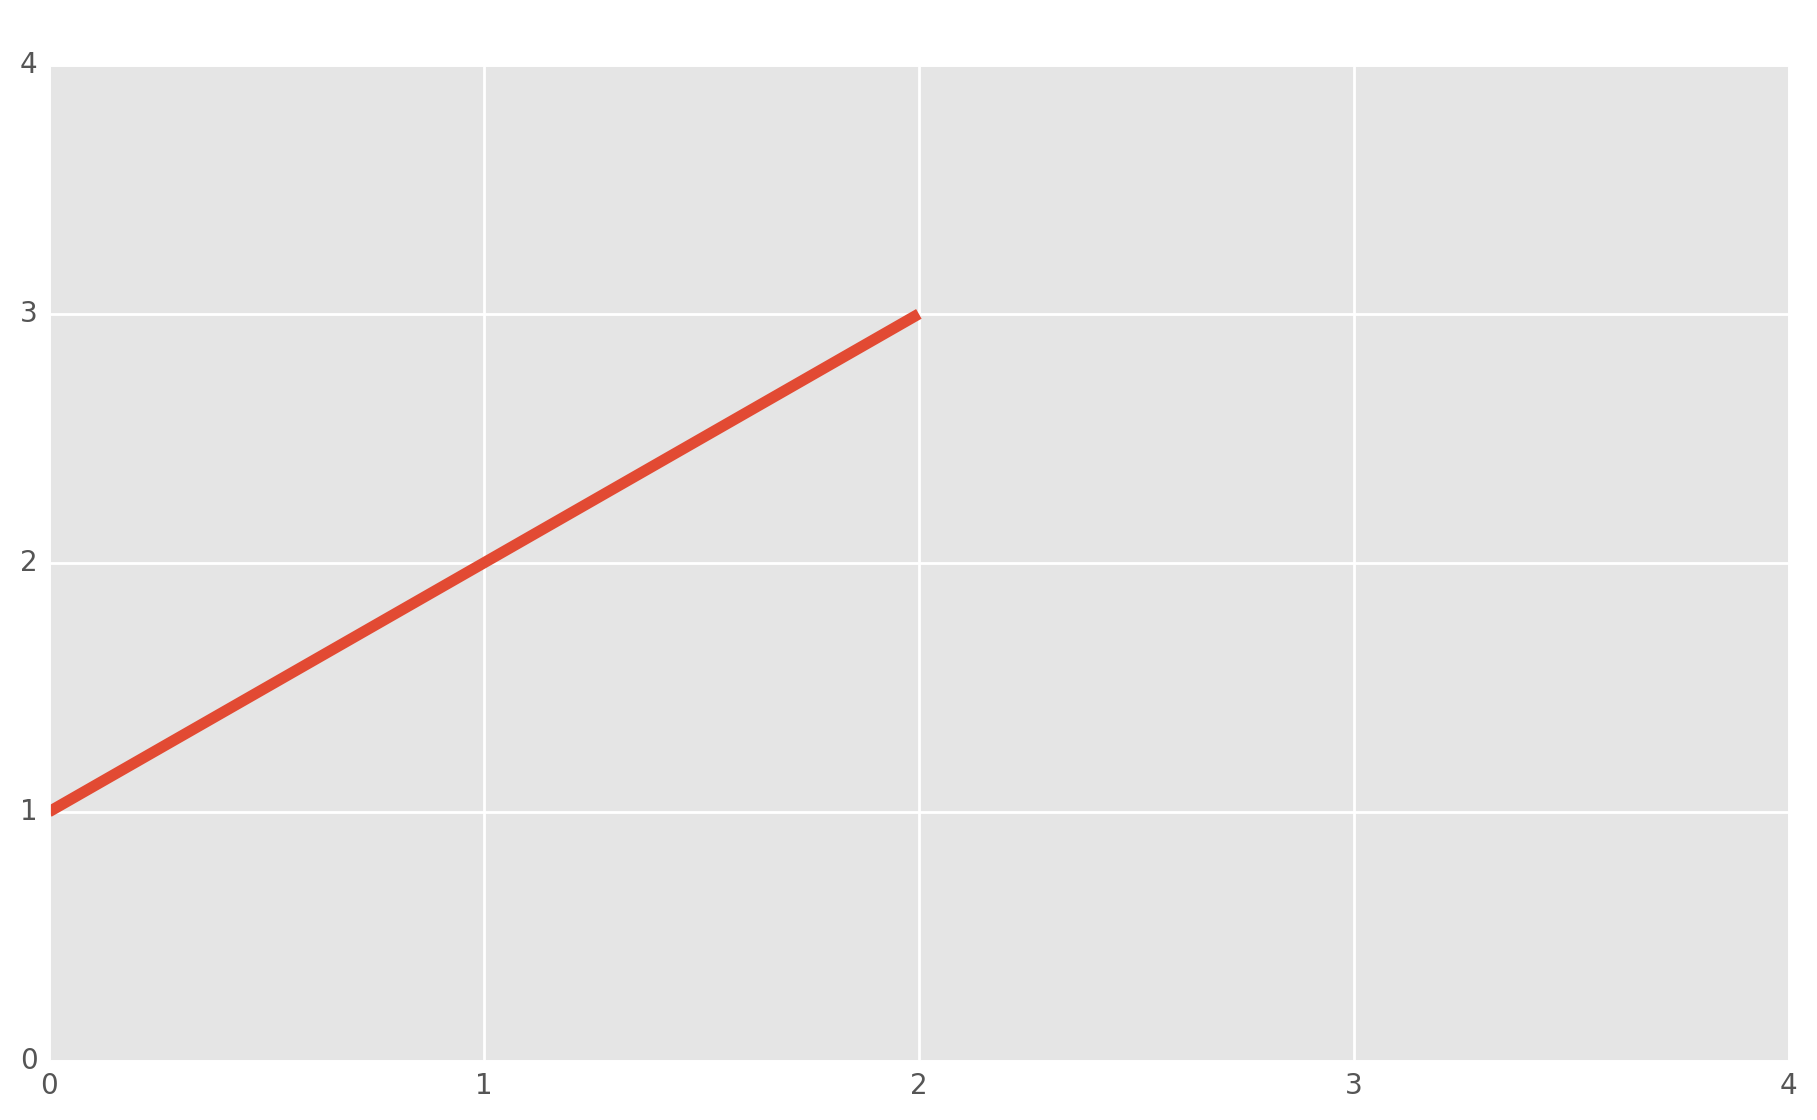

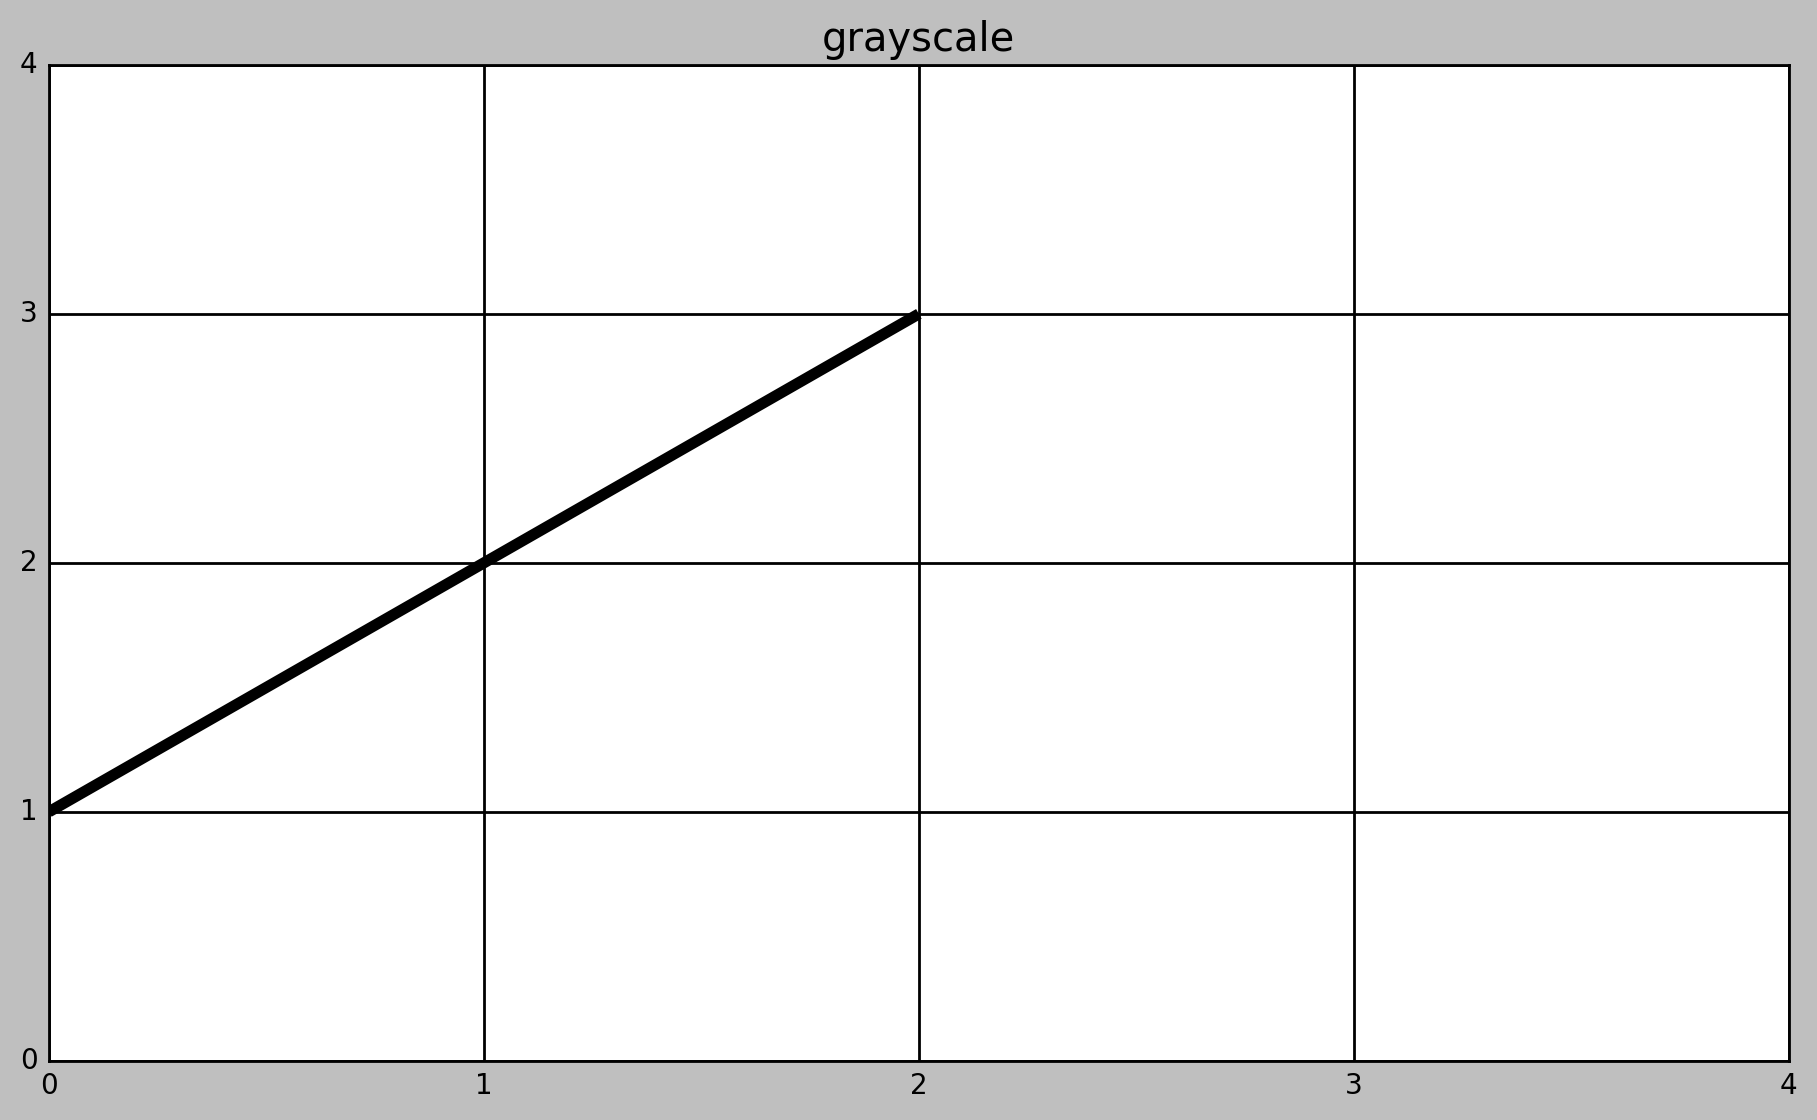

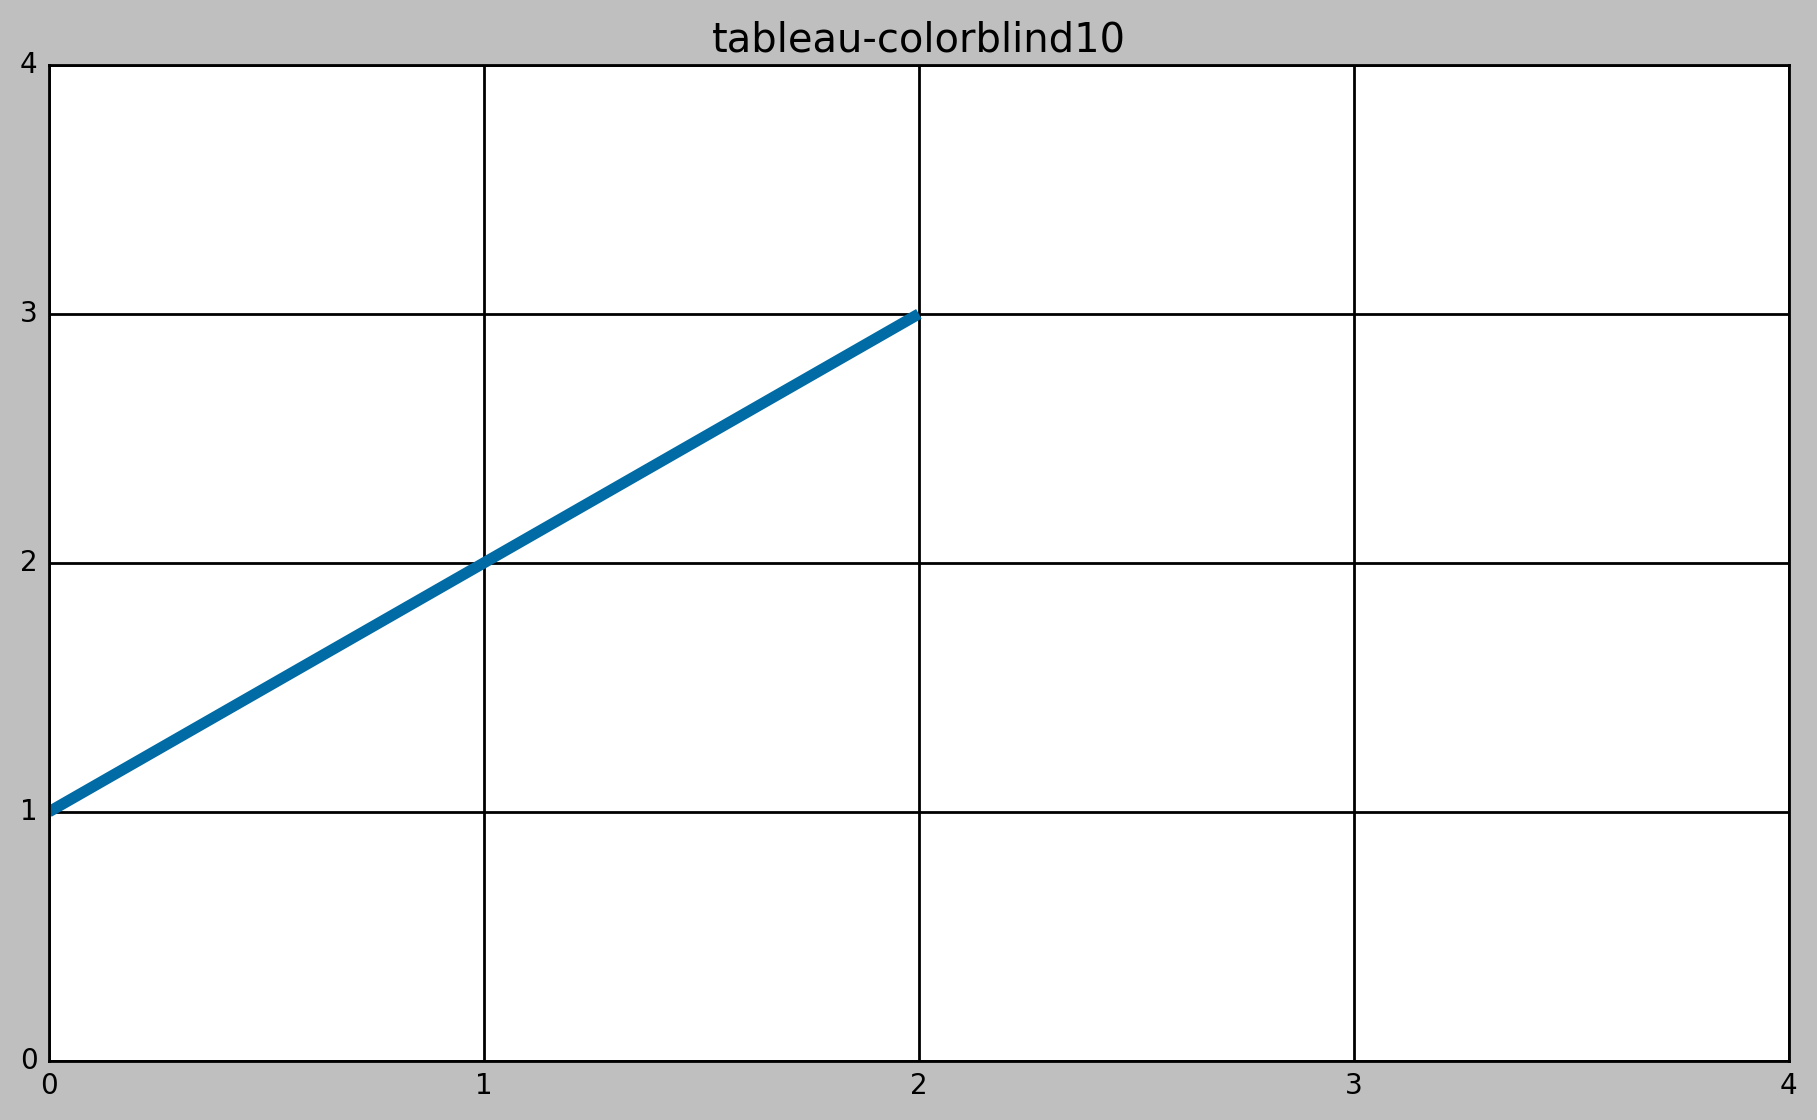

In [30]:
import matplotlib.pyplot as plt
estilos = ['bmh', 'classic', 'dark_background', 'fivethirtyeight', 'ggplot', 'grayscale', 'tableau-colorblind10']
for estilo in estilos:
    plt.style.use(estilo)
    plt.figure(figsize=(10, 6), dpi=200)
    plt.plot([1, 2, 3])
    plt.title(estilo)
    plt.xticks([0, 1, 2, 3, 4])  # Ajusta la escala del eje x
    plt.yticks([0, 1, 2, 3, 4])  # Ajusta la escala del eje y
    plt.show()

---